# ADVANCED STASTICS:  Laboratory Session 1

## Baci Ema 2050726

## Imports

In [37]:
# RUN TWICE TO REMOVE THE WARNING

suppressPackageStartupMessages({
    library(ggplot2)
    library(magick)
    library(tibble)
    library(readr)
    library(tidyverse)
    library(sqldf)
    library(dplyr)
    library(purrrlyr)
    library(zoo)
    library(tibbletime)
})

## EXERCISE 1 -  vectors and data frames

The following table gives the volume, area, length and maximum and mean depths of some Scottish
lakes. Create vectors, holding the lake’s name and all the parameters and build a dataframe
called scottish.lakes from the vectors.

### Load the data

In [2]:
Loch   <- c( 'Loch Ness',    'Loch Lomond', 'Loch Morar',   'Loch Tay', 
             'Loch Awe',     'Loch Maree',  'Loch Ericht',  'Loch Lochy', 
             'Loch Rannoch', 'Loch Shiel',  'Loch Katrine', 'Loch Arkaig', 
             'Loch Shin' )

Header <- c( 'Volume (km^3)',  'Volume (Mi^3)', 'Area (km^2)',    'Area (Mi^2)',   
             'Length (km)',    'Length (Mi)',   'Max. depth (m)', 'Max. depth (ft)', 
             'Mean depth (m)', 'Mean depth (ft)')

params <- read.table("DEPTH_LAKES.csv", sep=',', header = FALSE )
colnames(params) <- Header
scottish.lakes   <- cbind( Loch, params)
scottish         <- data.frame(scottish.lakes)
scottish.lakes

Loch         Volume (km^3) Volume (Mi^3) Area (km^2) Area (Mi^2) Length (km)
1  Loch Ness    7.45          1.790         56.0        22.0        36.2       
2  Loch Lomond  2.60          0.620         71.0        27.0        36.0       
3  Loch Morar   2.30          0.550         26.7        10.3        18.8       
4  Loch Tay     1.60          0.380         26.4        10.2        23.0       
5  Loch Awe     1.20          0.290         39.0        15.0        41.0       
6  Loch Maree   1.09          0.260         28.6        11.0        20.0       
7  Loch Ericht  1.08          0.260         18.6         7.2        23.0       
8  Loch Lochy   1.07          0.260         16.0         6.2        16.0       
9  Loch Rannoch 0.97          0.230         19.0         7.3        15.7       
10 Loch Shiel   0.79          0.190         19.5         7.5        28.0       
11 Loch Katrine 0.77          0.180         12.4         4.8        12.9       
12 Loch Arkaig  0.75          0.180         16.0         6.2        19.3       
13 Loch Shin    0.35          0.084         22.5         8.7        27.8       
   Length (Mi) Max. depth (m) Max. depth (ft) Mean depth (m) Mean depth (ft)
1  22.5        227             745            132.0          433            
2  22.0        190             620             37.0          121            
3  11.7        310            1020             87.0          285            
4  14.0        150             490             60.6          199            
5  25.0         94             308             32.0          105            
6  12.0        114             374             38.0          125            
7  14.0        156             512             57.6          189            
8   9.9        162             531             70.0          230            
9   9.8        134             440             51.0          167            
10 17.0        128             420             40.0          130            
11  8.0        151             495             43.4          142            
12 12.0        109             358             46.5          153            
13 17.3         49             161             15.5           51

1. Evaluate the highest and lowest volume and area lake

In [3]:
max_vol <- max(scottish.lakes$'Volume (km^3)')
min_vol <- min(scottish.lakes$'Volume (km^3)')
max_vol_index <- which(scottish.lakes$'Volume (km^3)' == max_vol)
min_vol_index <- which(scottish.lakes$'Volume (km^3)' == min_vol)
cat('Highest volume Lake is: ', Loch[max_vol_index],' (', max_vol, 'km^3 )')
cat('\nLowest  volume Lake is: ',  Loch[min_vol_index],' (', min_vol, 'km^3 )')

Highest volume Lake is:  Loch Ness  ( 7.45 km^3 )
Lowest  volume Lake is:  Loch Shin  ( 0.35 km^3 )

In [4]:
max_area <- max(scottish.lakes$'Area (km^2)')
min_area <- min(scottish.lakes$'Area (km^2)')
max_area_index <- which(scottish.lakes$'Area (km^2)' == max_area )
min_area_index <- which(scottish.lakes$'Area (km^2)' == min_area )
cat('Highest area Lake is: ', Loch[max_area_index],' (', max_area, 'km^2 )')
cat('\nLowest  area Lake is: ', Loch[min_area_index],'(', min_area, 'km^2 )')

Highest area Lake is:  Loch Lomond  ( 71 km^2 )
Lowest  area Lake is:  Loch Katrine ( 12.4 km^2 )

2. Order the frame with respect to the area and determine the two largest area lakes

In [5]:
sort   <- order(scottish.lakes$'Area (km^2)', decreasing = TRUE)
sorted <- scottish.lakes[sort, c(1,2,3,4,5,6,7,8,9,10,11)]
head(sorted)

Loch        Volume (km^3) Volume (Mi^3) Area (km^2) Area (Mi^2) Length (km)
2 Loch Lomond 2.60          0.62          71.0        27.0        36.0       
1 Loch Ness   7.45          1.79          56.0        22.0        36.2       
5 Loch Awe    1.20          0.29          39.0        15.0        41.0       
6 Loch Maree  1.09          0.26          28.6        11.0        20.0       
3 Loch Morar  2.30          0.55          26.7        10.3        18.8       
4 Loch Tay    1.60          0.38          26.4        10.2        23.0       
  Length (Mi) Max. depth (m) Max. depth (ft) Mean depth (m) Mean depth (ft)
2 22.0        190             620             37.0          121            
1 22.5        227             745            132.0          433            
5 25.0         94             308             32.0          105            
6 12.0        114             374             38.0          125            
3 11.7        310            1020             87.0          285            
4 14.0        150             490             60.6          199

In [6]:
cat('Highest area Lake are:  ', scottish.lakes$'Loch'[sort[1]],' (', scottish.lakes$'Area (km^2)'[sort[1]], 'km^2 )')
cat('\n\t\t\t', scottish.lakes$'Loch'[sort[2]],'   (', scottish.lakes$'Area (km^2)'[sort[2]], 'km^2 )')

Highest area Lake are:   Loch Lomond  ( 71 km^2 )
			 Loch Ness    ( 56 km^2 )

3. By summing up the areas occupied by the lakes, determine the area of Scotland covered by water

In [7]:
area_scotland <- 77910
tot_lakes     <- sum(scottish.lakes$'Area (km^2)')

cat('Total area of Scotland covered by water:', tot_lakes ,
    '\nFraction of Scotland covered by water:', tot_lakes/area_scotland ) 

Total area of Scotland covered by water: 371.7 
Fraction of Scotland covered by water: 0.004770889

## EXERCISE 2 - Crude Oil Production

The following CSV file
https://drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view contains data
on crude oil prices from 1861 to 2020, measured in US dollars per barrel.

1. Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure)

In [8]:
file             <- 'crude-oil-prices.csv'
Oil.df           <- read.csv( file, header = FALSE )
Header           <- c( 'Entity',  'Code', 'Year', 'Oil_prices')
colnames(Oil.df) <- Header
head(Oil.df)

Entity Code     Year Oil_prices
1 World  OWID_WRL 1861 0.49      
2 World  OWID_WRL 1862 1.05      
3 World  OWID_WRL 1863 3.15      
4 World  OWID_WRL 1864 8.06      
5 World  OWID_WRL 1865 6.59      
6 World  OWID_WRL 1866 3.74

2. Produce a plot with the Oil price as a function of the year

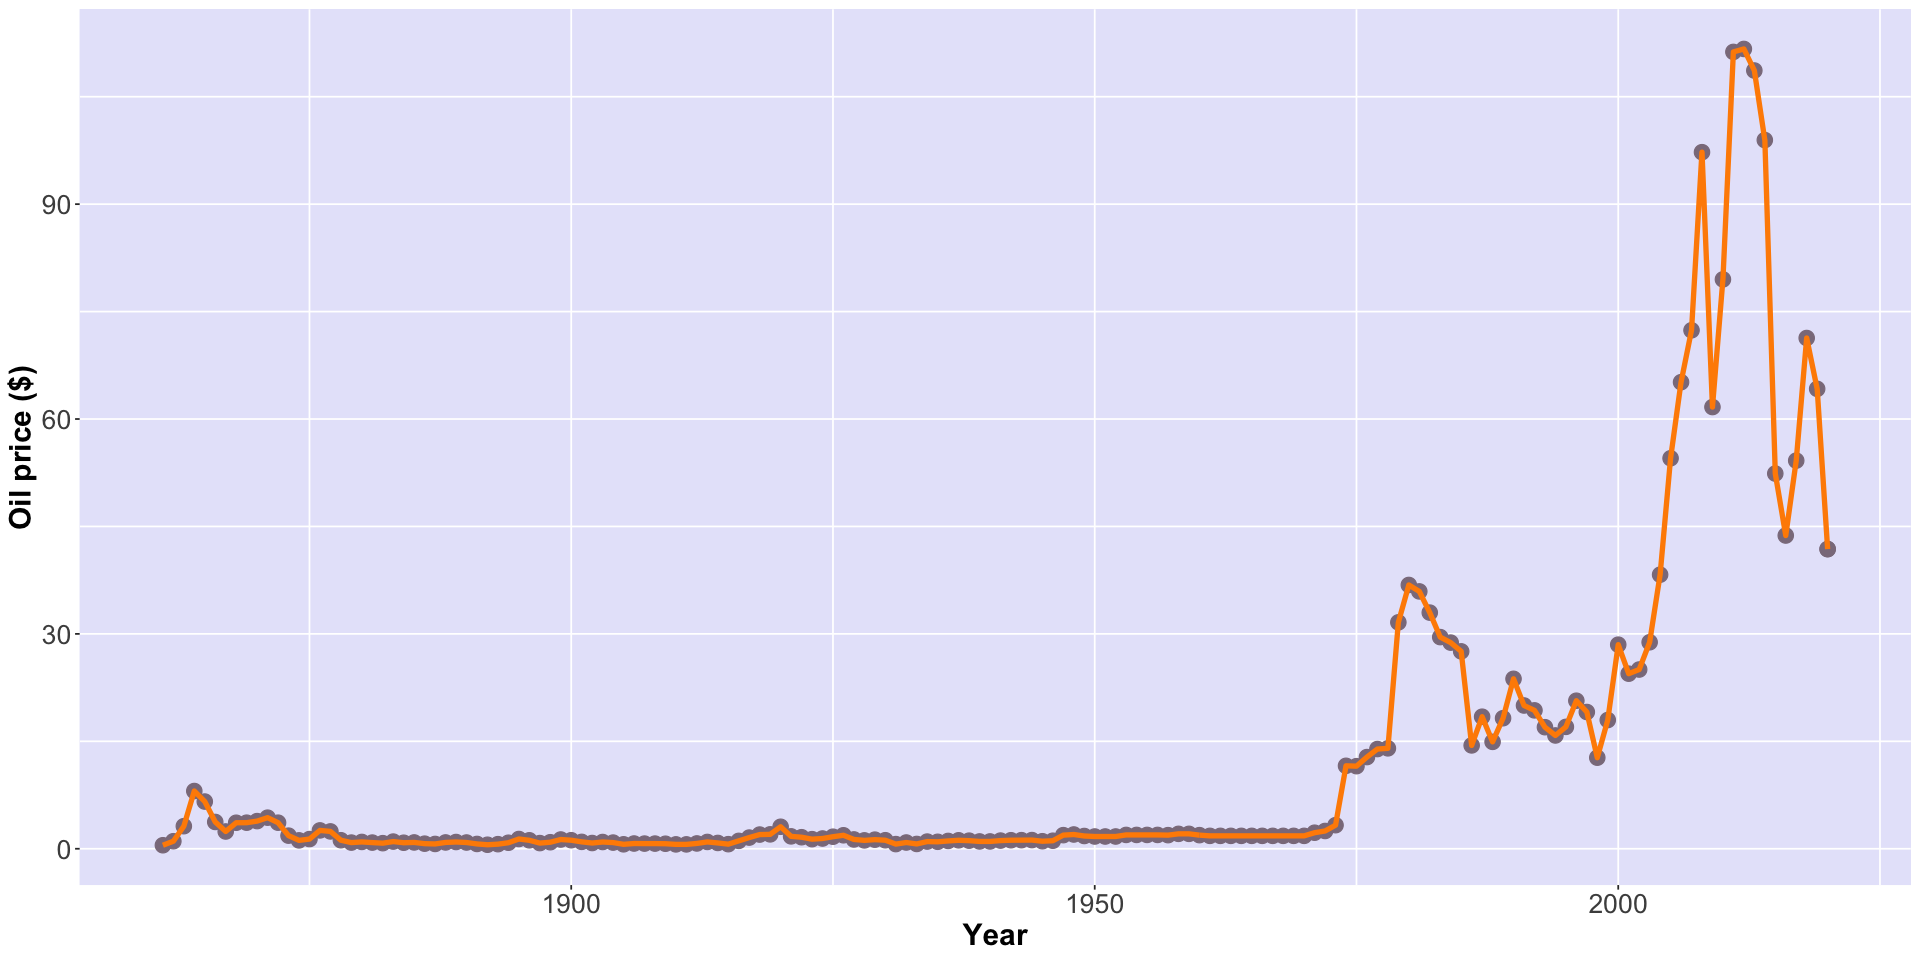

In [9]:
options(repr.plot.width=16, repr.plot.height=8)

Oil.price <- ggplot(Oil.df, aes(Year)) + 
             geom_point(aes(y = Oil_prices), color = 'thistle4',   size = 4) + 
             geom_line( aes(y = Oil_prices), color = 'darkorange', size = 1.5) 

layout    <- theme( axis.text        = element_text(size = 16),
                    axis.title       = element_text(size = 18, face = "bold"),
                    panel.background = element_rect(fill = 'lavender', colour = "lavender",
                                                    size = 0.5, linetype = "solid"),
                    panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
                    panel.grid.minor = element_line(size = 0.5, linetype = 'solid', colour = "white") )

labels    <- labs( y   = "Oil price ($)")

Oil.price <- Oil.price + layout + labels

Oil.price

3. Which is the highest price in history ? When did it occur ?

In [10]:
max_prices       <- max(  Oil.df$'Oil_prices')
max_prices_index <- which(Oil.df$'Oil_prices' == max_prices)

cat('Highest price in history is: ', round(max_prices, 2) ,'dollars, occurred in ', Oil.df$'Year'[max_prices_index])

Highest price in history is:  111.67 dollars, occurred in  2012

4. Plot the derivative of the curve, simply evaluated with the finite difference formula (forward derivative):

In [11]:
# evaluate the derivative as delta = Oil_prices[i+1]- Oil_prices[i]

shift  <- c(tail(Oil.df$'Oil_prices', -1), rep(NA, 1))
Oil.df <- cbind( Oil.df, shift )
delta  <- Oil.df$'shift' -  Oil.df$'Oil_prices'  
Oil.df <- cbind( Oil.df, delta )
Oil.df <- na.omit( Oil.df ) 
head(Oil.df)

Entity Code     Year Oil_prices shift delta
1 World  OWID_WRL 1861 0.49       1.05   0.56
2 World  OWID_WRL 1862 1.05       3.15   2.10
3 World  OWID_WRL 1863 3.15       8.06   4.91
4 World  OWID_WRL 1864 8.06       6.59  -1.47
5 World  OWID_WRL 1865 6.59       3.74  -2.85
6 World  OWID_WRL 1866 3.74       2.41  -1.33

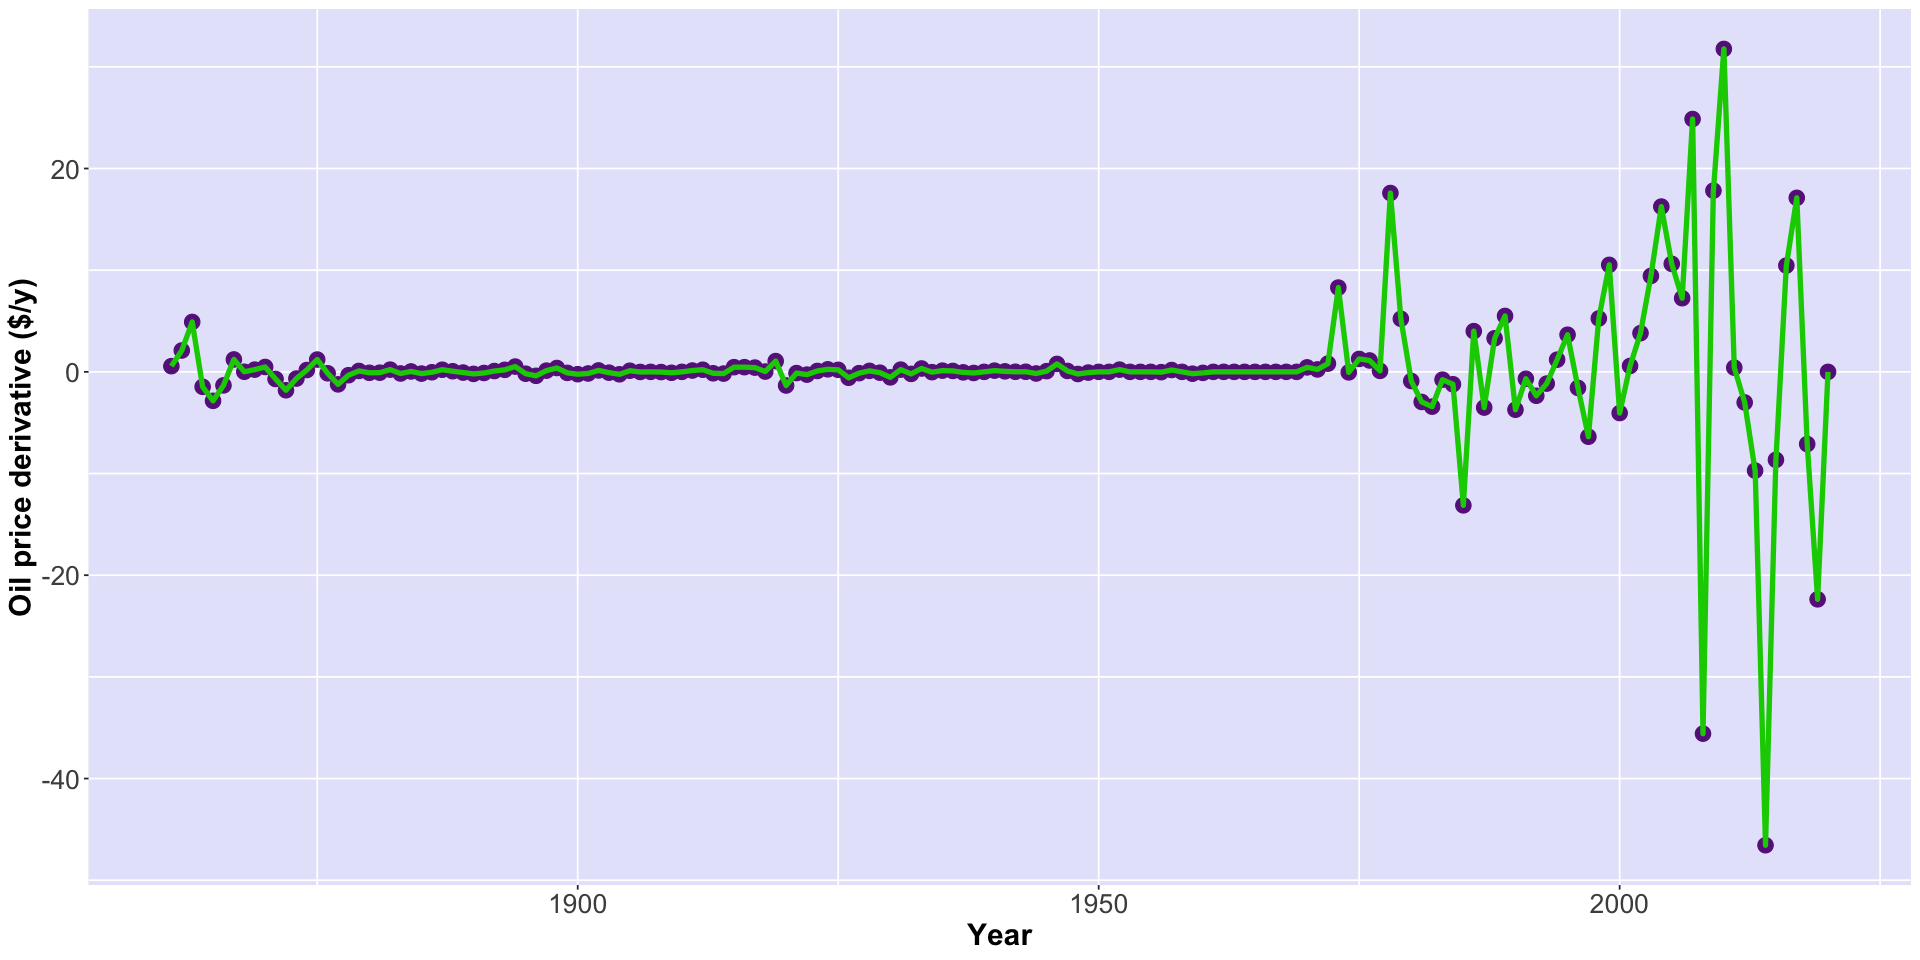

In [12]:
options(repr.plot.width = 16, repr.plot.height = 8)

derivative <- ggplot( Oil.df, aes(Year)) + 
                geom_point( aes(y  = delta, colour = 'derivative'), 
                            color  = 'darkorchid4', size = 4) +
                geom_line(  aes( y = delta ),  
                            color  = 'green3', size = 1.5)      

layout <- theme( axis.text  = element_text(size=16),
                 axis.title = element_text(size=18,face="bold"),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels     <- labs( y  = "Oil price derivative ($/y)")
derivative <- derivative + layout + labels
derivative

## EXERCISE 3 - World Coal Production

The following CSV file

https://drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing

contains data on the coal production (in TW · hour) for several countries in the World 

1. Write R code that is able to read the file and import it in a tibble structure

In [13]:
file              <- 'coal-production-by-country.csv'
coal_tb           <- read_csv( file, show_col_types = FALSE ) 
Header            <- c( 'Entity',  'Code', 'Year', 'Coal production (TWh)')
colnames(coal_tb) <- make.names(Header)
spec(coal_tb)
head(coal_tb)


cols(
  Afghanistan = col_character(),
  AFG = col_character(),
  `1900` = col_double(),
  `0` = col_double()
)

Entity      Code Year Coal.production..TWh.
1 Afghanistan AFG  1901 0                    
2 Afghanistan AFG  1902 0                    
3 Afghanistan AFG  1903 0                    
4 Afghanistan AFG  1904 0                    
5 Afghanistan AFG  1905 0                    
6 Afghanistan AFG  1906 0

2. Count the number of countries available in the file and produce a barplot with the number of entries for each  country

In [14]:
Count_countries <- sqldf("SELECT Entity, COUNT(distinct(Year)) as Counts 
                          FROM coal_tb 
                          GROUP BY Entity")
Count_countries <- as_tibble(Count_countries)
head(Count_countries)

Entity              Counts
1 Afghanistan         116   
2 Africa              104   
3 Albania             117   
4 Algeria              65   
5 American Samoa       37   
6 Antigua and Barbuda  37

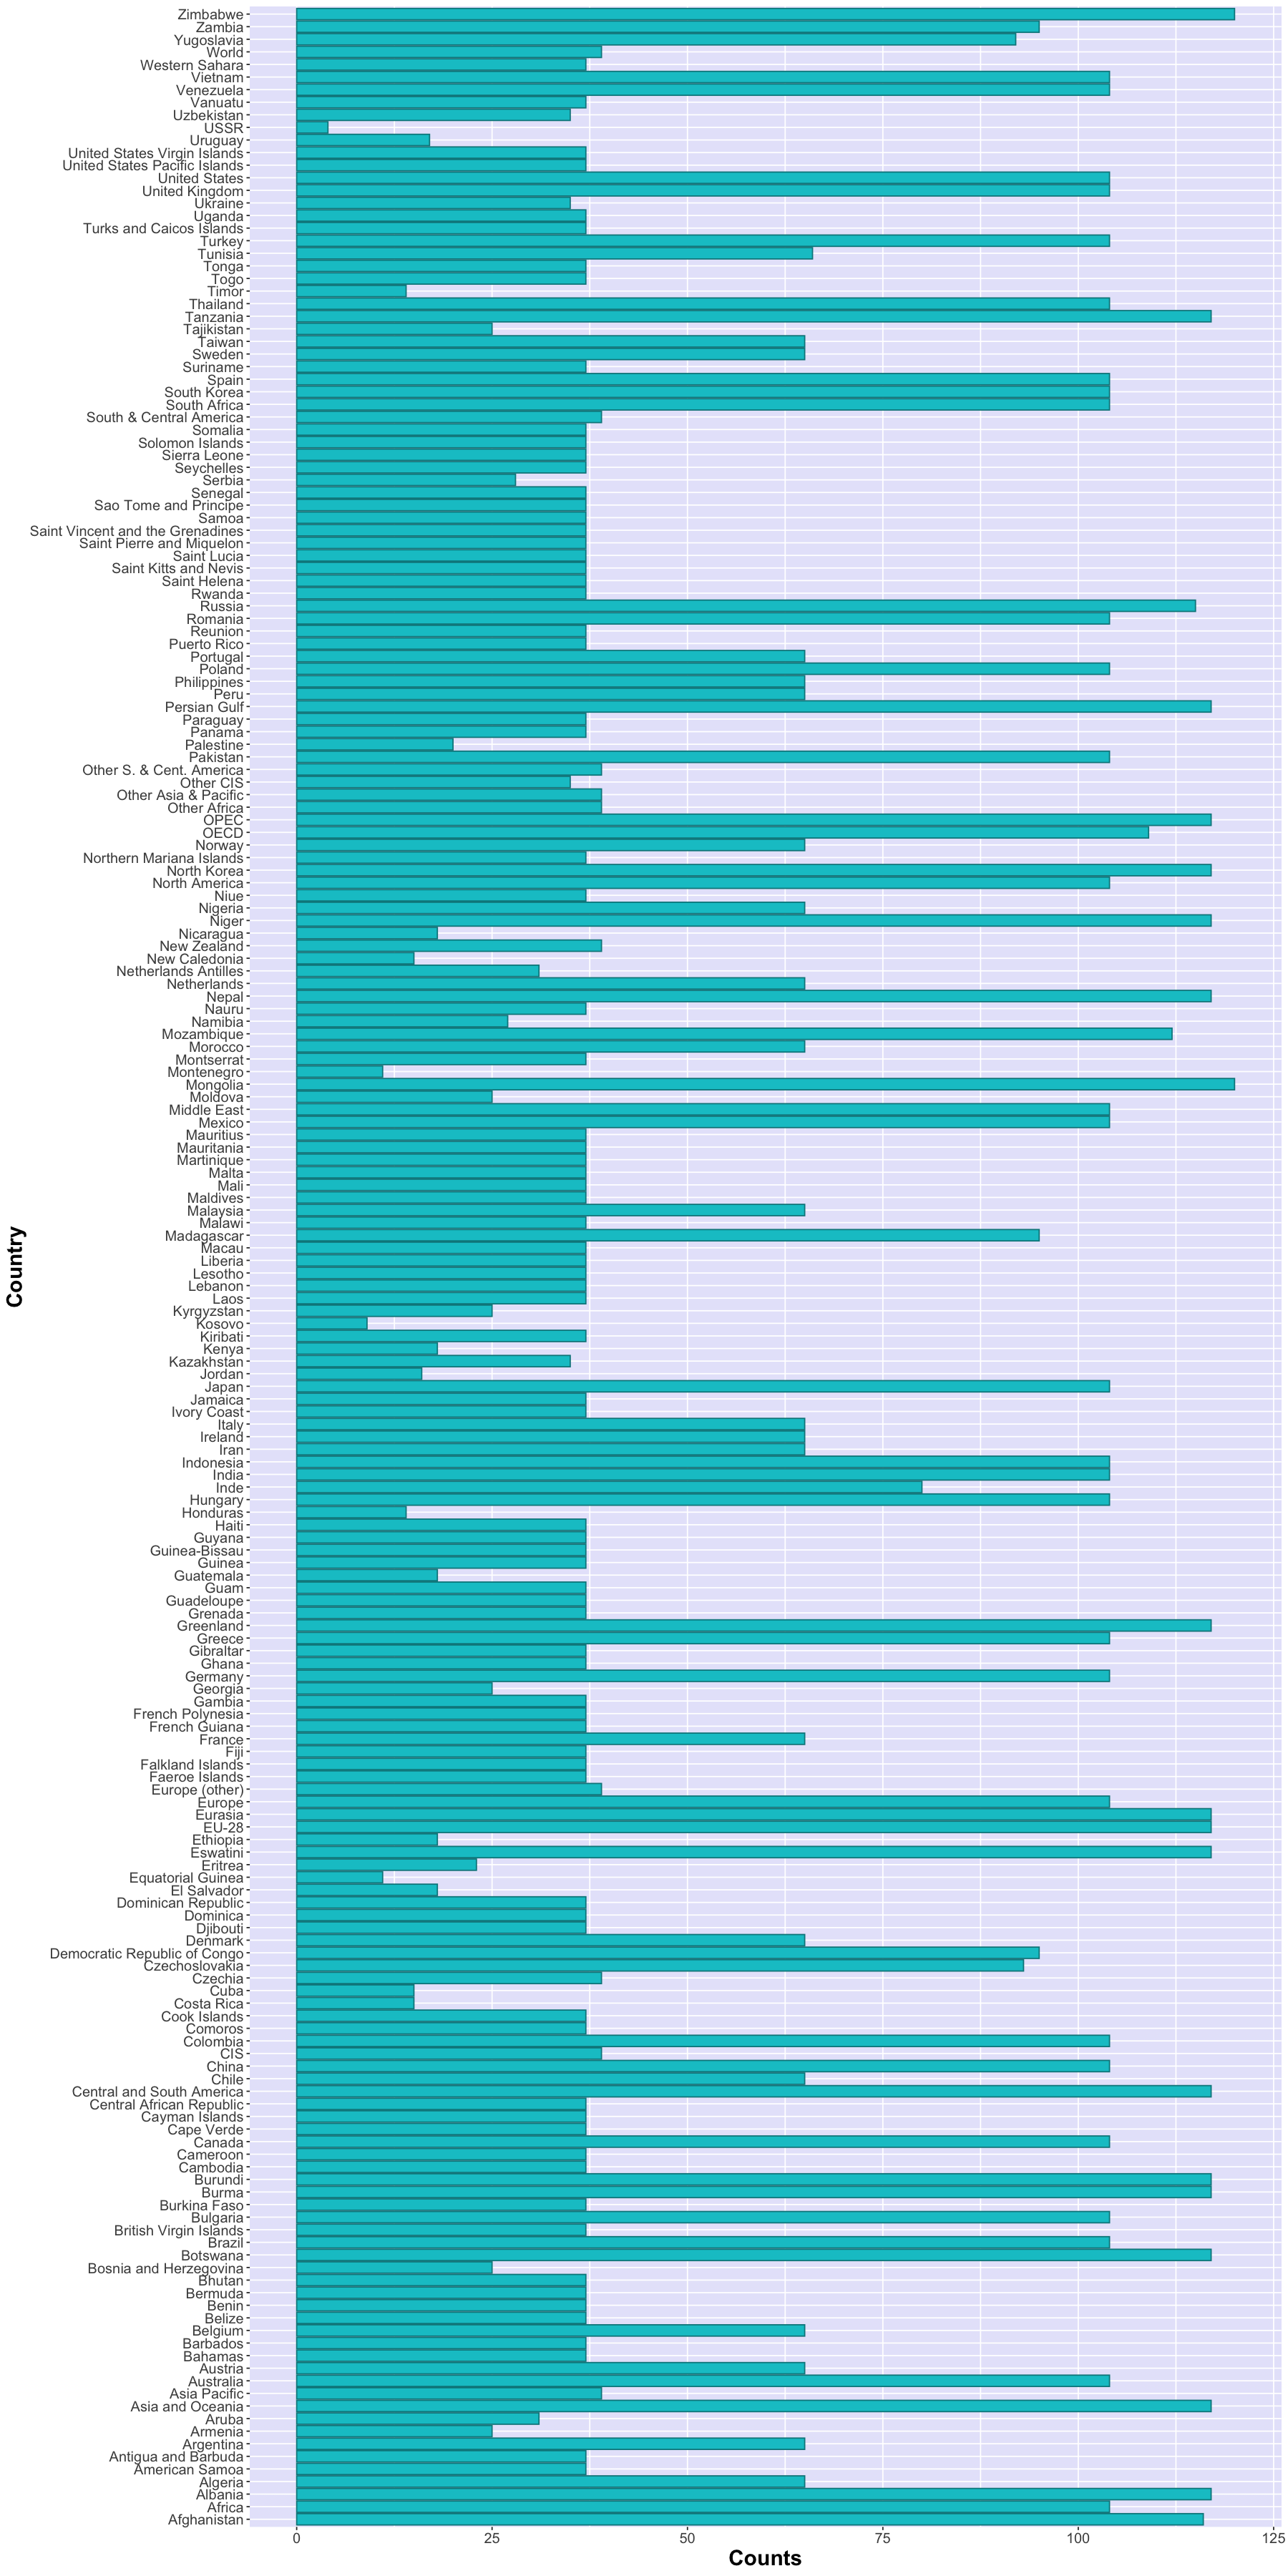

In [15]:
options(repr.plot.width = 15, repr.plot.height = 30, las = 1)
# Barplot
barplot <- ggplot(Count_countries, aes(x = Entity, y = Counts)) + 
                  geom_bar(stat = "identity", color='turquoise4', fill='turquoise3') +
                  coord_flip()

layout <- theme( axis.text  = element_text(size=12),
                 axis.title = element_text(size=18,face="bold"),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels  <- labs( x = 'Country',
                 y = 'Counts')
barplot <- barplot + layout + labels

barplot

For the following items select only the years ≥ 1970:

3. Selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

In [16]:
# Select only the year after 1970
# remove continents, regions
mask <- filter(coal_tb, Year >= 1970) 
mask <- filter(mask, !is.na(Code)) 
head(mask)

Entity      Code Year Coal.production..TWh.
1 Afghanistan AFG  1970 1.335                
2 Afghanistan AFG  1971 1.099                
3 Afghanistan AFG  1972 0.578                
4 Afghanistan AFG  1973 0.952                
5 Afghanistan AFG  1974 0.936                
6 Afghanistan AFG  1975 1.221

In [17]:
coal_tot <- as_tibble(aggregate( x      = mask$'Coal.production..TWh.' ,               
                                 by     = list(mask$'Entity'),              
                                 FUN    = sum, 
                                 header = FALSE) )                           

Header         <- c( 'Entity', 'Total Coal production (TWh)')
colnames(coal_tot)  <- make.names(Header)


sort            <- order(coal_tot$'Total.Coal.production..TWh.', decreasing = TRUE)
coal_tot_sorted <- coal_tot[sort, c(1,2)]
head(coal_tot_sorted)
# country not continents

Entity        Total.Coal.production..TWh.
1 World         1260113.24                 
2 China          459564.65                 
3 United States  226068.84                 
4 Russia         101908.49                 
5 Australia       83077.07                 
6 India           77043.45

In [18]:
# print the top 5 Countries with highest coal productions
Top.coal.contries <- c(coal_tot_sorted$'Entity'[1:6])
for(i in 2:6) {
  cat(i-1,':',Top.coal.contries[i],', total coal production',coal_tot_sorted$'Total.Coal.production..TWh.'[i],' TW x hour\n')
}


1 : China , total coal production 459564.6  TW x hour
2 : United States , total coal production 226068.8  TW x hour
3 : Russia , total coal production 101908.5  TW x hour
4 : Australia , total coal production 83077.07  TW x hour
5 : India , total coal production 77043.45  TW x hour


4. For the 5 top Countries, create a plot of production as a function of time

In [19]:
coal_sum <- mask%>%group_by(Entity)%>%mutate(coal_sum =cumsum(Coal.production..TWh.))
head(coal_sum)

Entity      Code Year Coal.production..TWh. coal_sum
1 Afghanistan AFG  1970 1.335                 1.335   
2 Afghanistan AFG  1971 1.099                 2.434   
3 Afghanistan AFG  1972 0.578                 3.012   
4 Afghanistan AFG  1973 0.952                 3.964   
5 Afghanistan AFG  1974 0.936                 4.900   
6 Afghanistan AFG  1975 1.221                 6.121

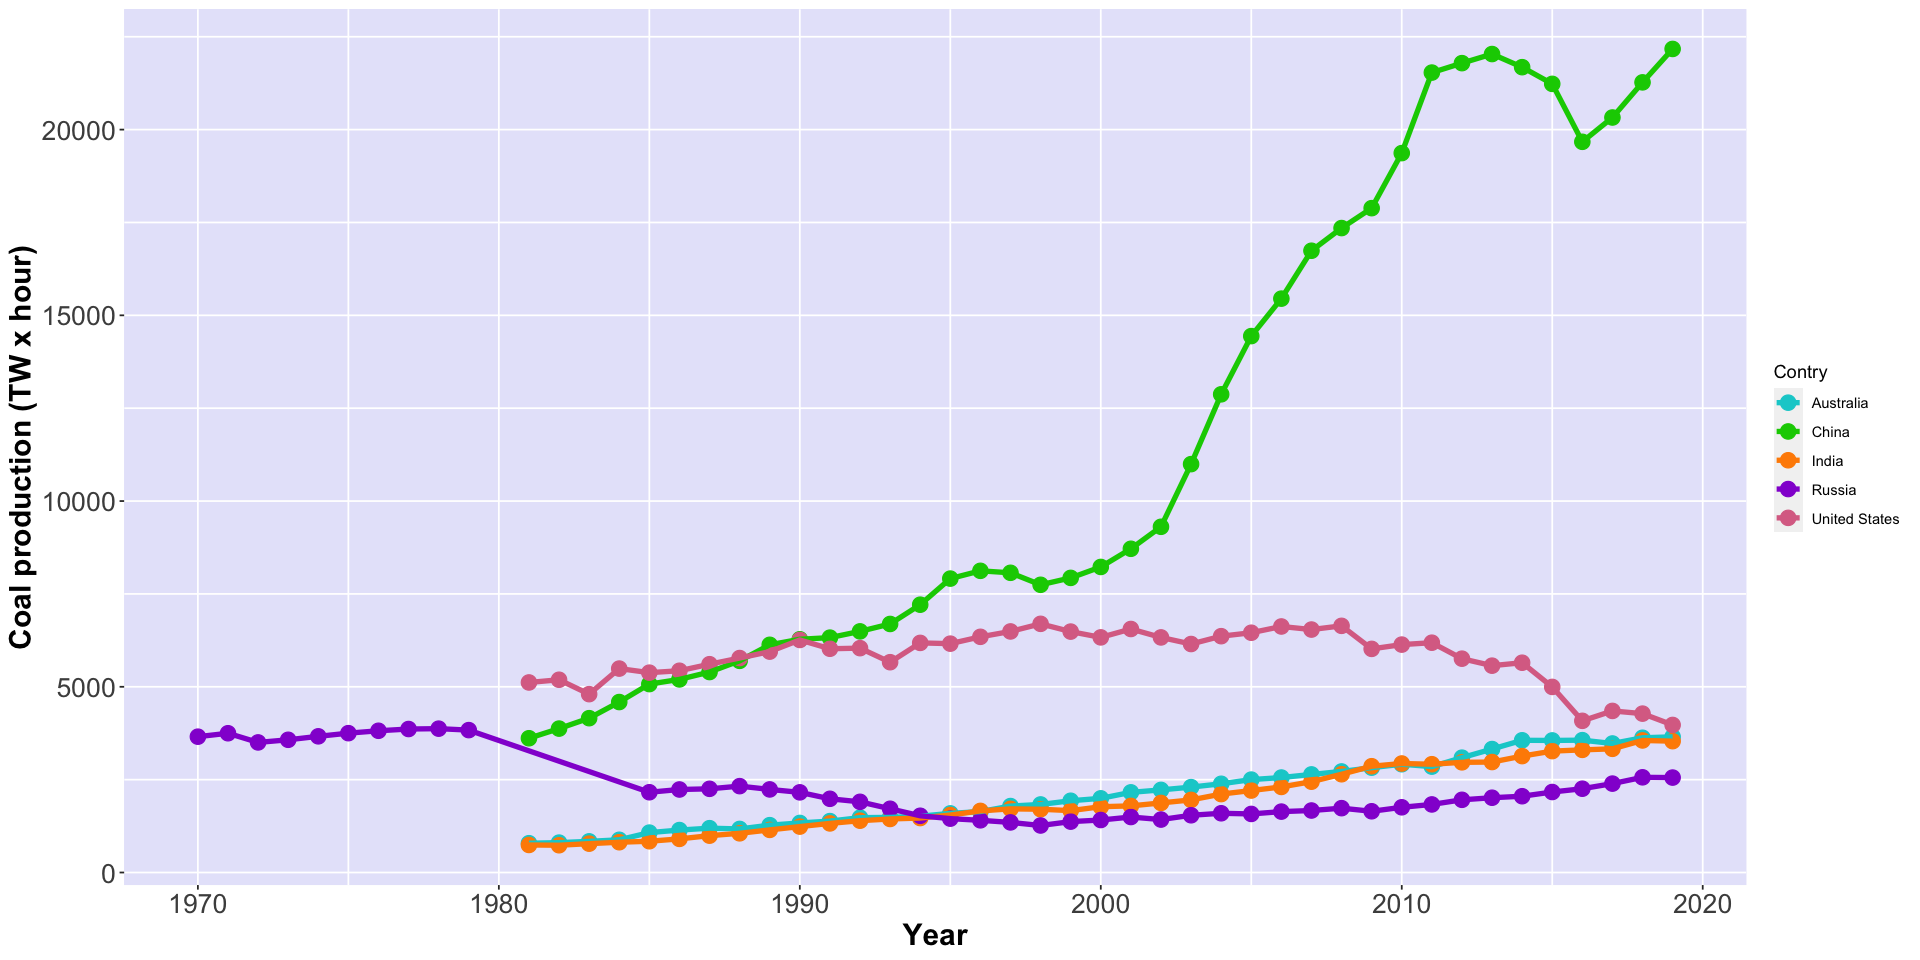

In [20]:
options( repr.plot.width = 16, repr.plot.height = 8 )

my_cols <- c('darkturquoise','green3','darkorange','darkviolet', 'palevioletred')

coal    <- ggplot(subset(mask, Entity %in% Top.coal.contries[2:6])) +
                geom_point( aes(x = Year, y = Coal.production..TWh., group=Entity, colour=Entity), size = 4)+
                geom_line(  aes(x = Year, y = Coal.production..TWh., group=Entity, colour=Entity), size = 1.5)+
                scale_colour_manual(values = my_cols)
                #scale_colour_manual(values = colors1)

    #facet_wrap( vars(Entity), nrow = 1, ncol = 5)#, trim_blank = FALSE); #scales = 'free');
layout <- theme( axis.text  = element_text(size=16),
                 axis.title = element_text(size=18,face="bold"),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels     <- labs( color = 'Contry',
                    y     = "Coal production (TW x hour)")
coal <- coal + layout + labels

coal


5. Generate a plot with the cumulative sum of the World’s coal production over the years

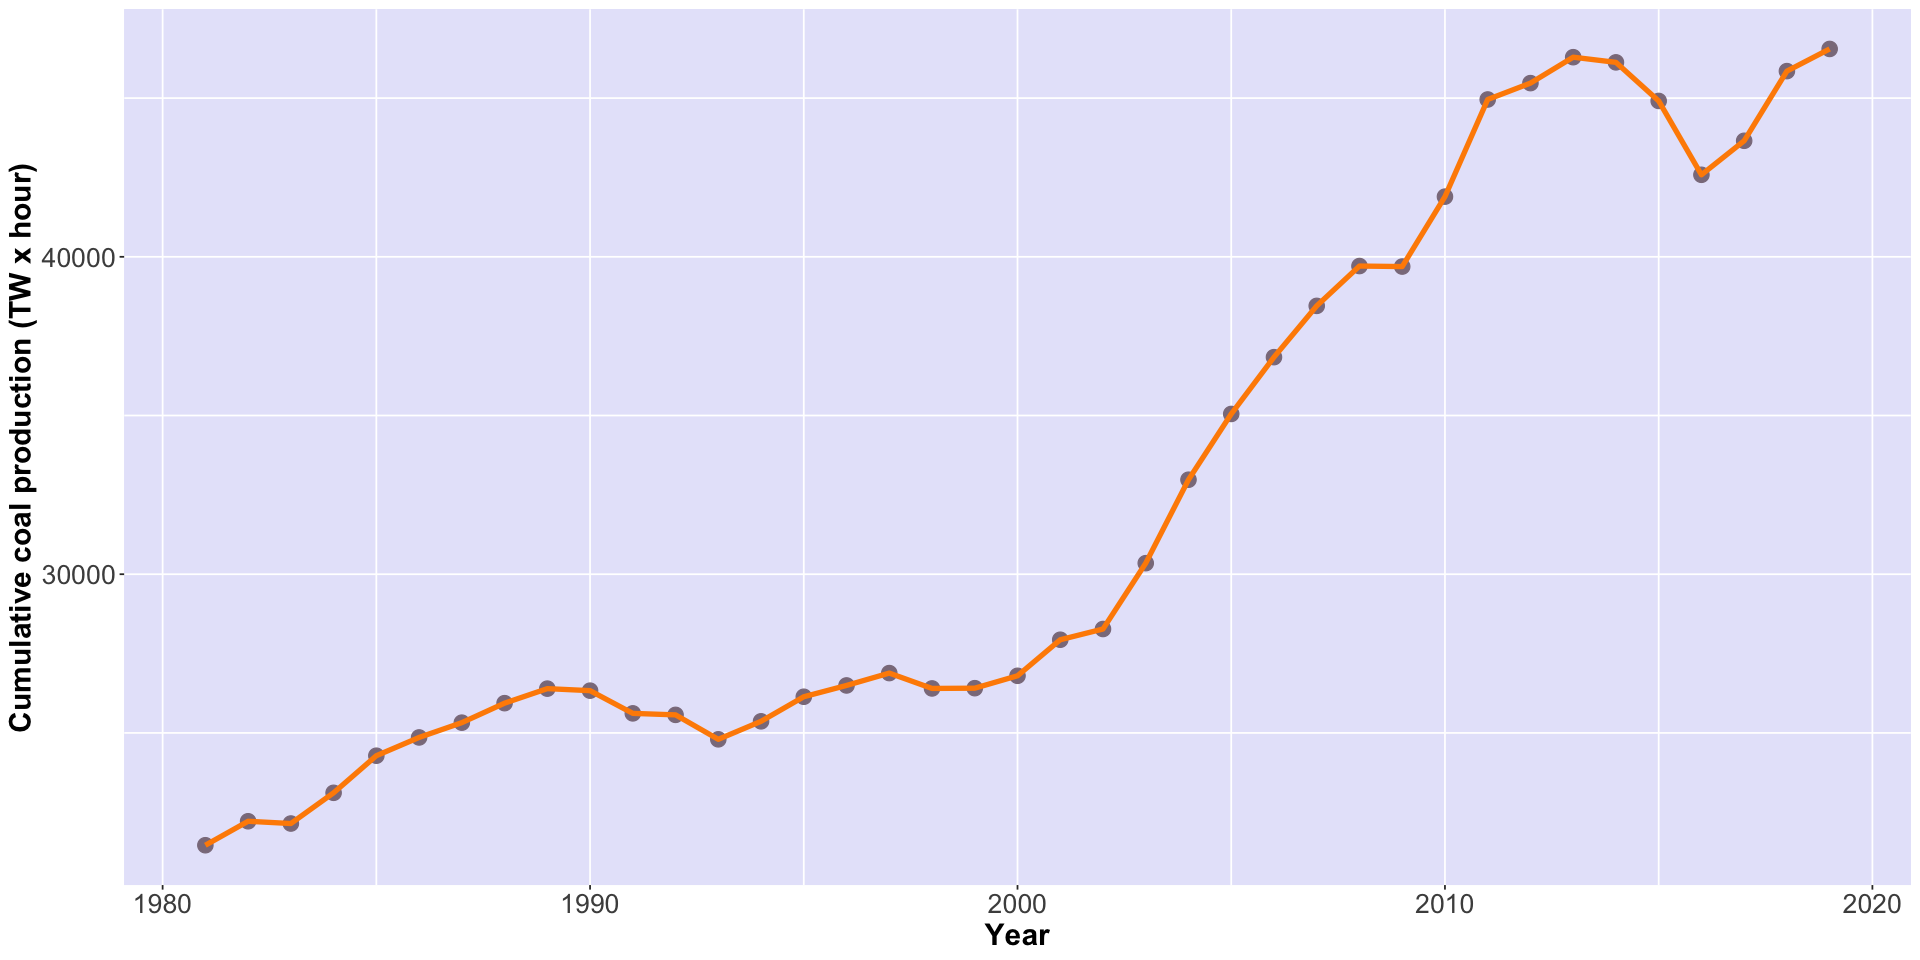

In [21]:
options(repr.plot.width = 16, repr.plot.height = 8)
coal_world <- ggplot(subset(coal_sum, Entity %in% Top.coal.contries[1] )) +
                geom_point( aes(x = Year, y = Coal.production..TWh., group=Entity, colour=Entity), color = 'thistle4',   size = 4) +
                geom_line( aes(x = Year,  y = Coal.production..TWh., group=Entity, colour=Entity), color = 'darkorange', size = 1.5) 


layout <- theme( axis.text  = element_text(size=16),
                 axis.title = element_text(size=18,face="bold"),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels     <- labs( y  = "Cumulative coal production (TW x hour)")
coal_world <- coal_world + layout + labels
coal_world

## EXERCISE 4 - Covid19 Vaccine data

Data on Covid-19 vaccine can be found on: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations

The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv contains a summary
on the vaccination data grouped by Vaccine type and Country.

In [22]:
file       <- 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'
vaccine.tb <- read_csv(url(file), show_col_types = FALSE)
head(vaccine.tb)

location  date       vaccine            total_vaccinations
1 Argentina 2020-12-29 Moderna                2             
2 Argentina 2020-12-29 Oxford/AstraZeneca     5             
3 Argentina 2020-12-29 Sinopharm/Beijing      1             
4 Argentina 2020-12-29 Sputnik V          20482             
5 Argentina 2020-12-30 Moderna                2             
6 Argentina 2020-12-30 Oxford/AstraZeneca     5

1. Filter the original tibble by selecting the following countries: Italy

In [23]:
vaccine_Italy <- filter(vaccine.tb, location == 'Italy') 

# add missing dates
vaccine_Italy <- complete(vaccine_Italy,location, date, vaccine)

# put a dummy row between two different sets of vaccines
# with 0 vaccines shots
vaccine_Italy  <- vaccine_Italy  %>%
   split(list(.$'vaccine')) %>%
   map_dfr(~bind_rows(tibble(total_vaccinations = 0), .x))

# assign at NA's the value of the day before
vaccine_Italy  <- vaccine_Italy  %>%
        fill('total_vaccinations') %>% # default direction down
        fill('total_vaccinations', .direction = "down")

# remove 0s and NAs
vaccine_Italy [vaccine_Italy ==0] <- NA
vaccine_Italy  <- vaccine_Italy  %>% drop_na()

head(vaccine_Italy)

total_vaccinations location date       vaccine        
1  9                 Italy    2021-01-04 Johnson&Johnson
2 11                 Italy    2021-01-05 Johnson&Johnson
3 13                 Italy    2021-01-06 Johnson&Johnson
4 15                 Italy    2021-01-07 Johnson&Johnson
5 15                 Italy    2021-01-08 Johnson&Johnson
6 15                 Italy    2021-01-09 Johnson&Johnson

2. Plot the number of vaccines given as a function of time for the different vaccine manufacturer

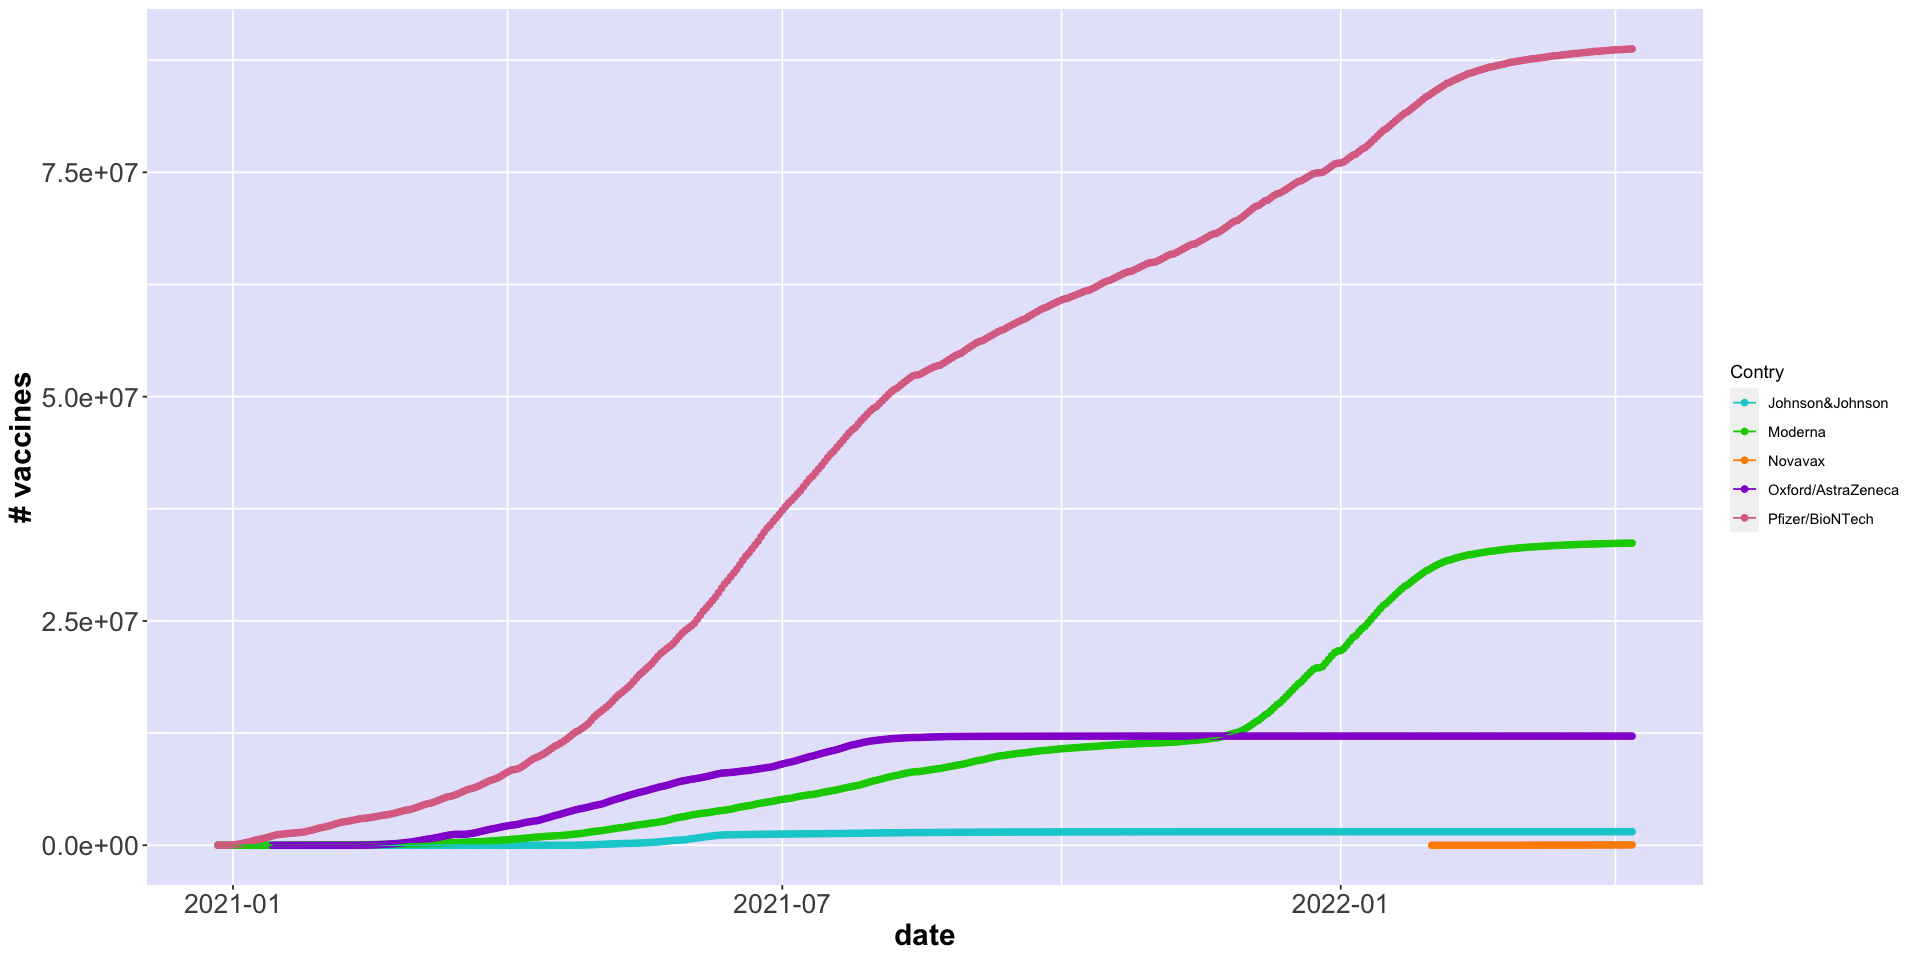

In [38]:
options( repr.plot.width = 16, repr.plot.height = 8 )
my_cols <- c('darkturquoise','green3','darkorange','darkviolet', 'palevioletred')

vaccine <- ggplot(vaccine_Italy, aes(x = date, y = total_vaccinations,  group=vaccine, colour=vaccine)) +
                geom_point( ) +
                geom_line()+
                scale_colour_manual(values = my_cols)
    
layout <- theme( axis.text  = element_text(size=16),
                 axis.title = element_text(size=18,face="bold"),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size   = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels     <- labs( color = 'Contry',
                    y     = "# vaccines")
vaccine    <- vaccine + layout + labels

vaccine


3. From the same tibble plot the total number of vaccines shot per day in Italy


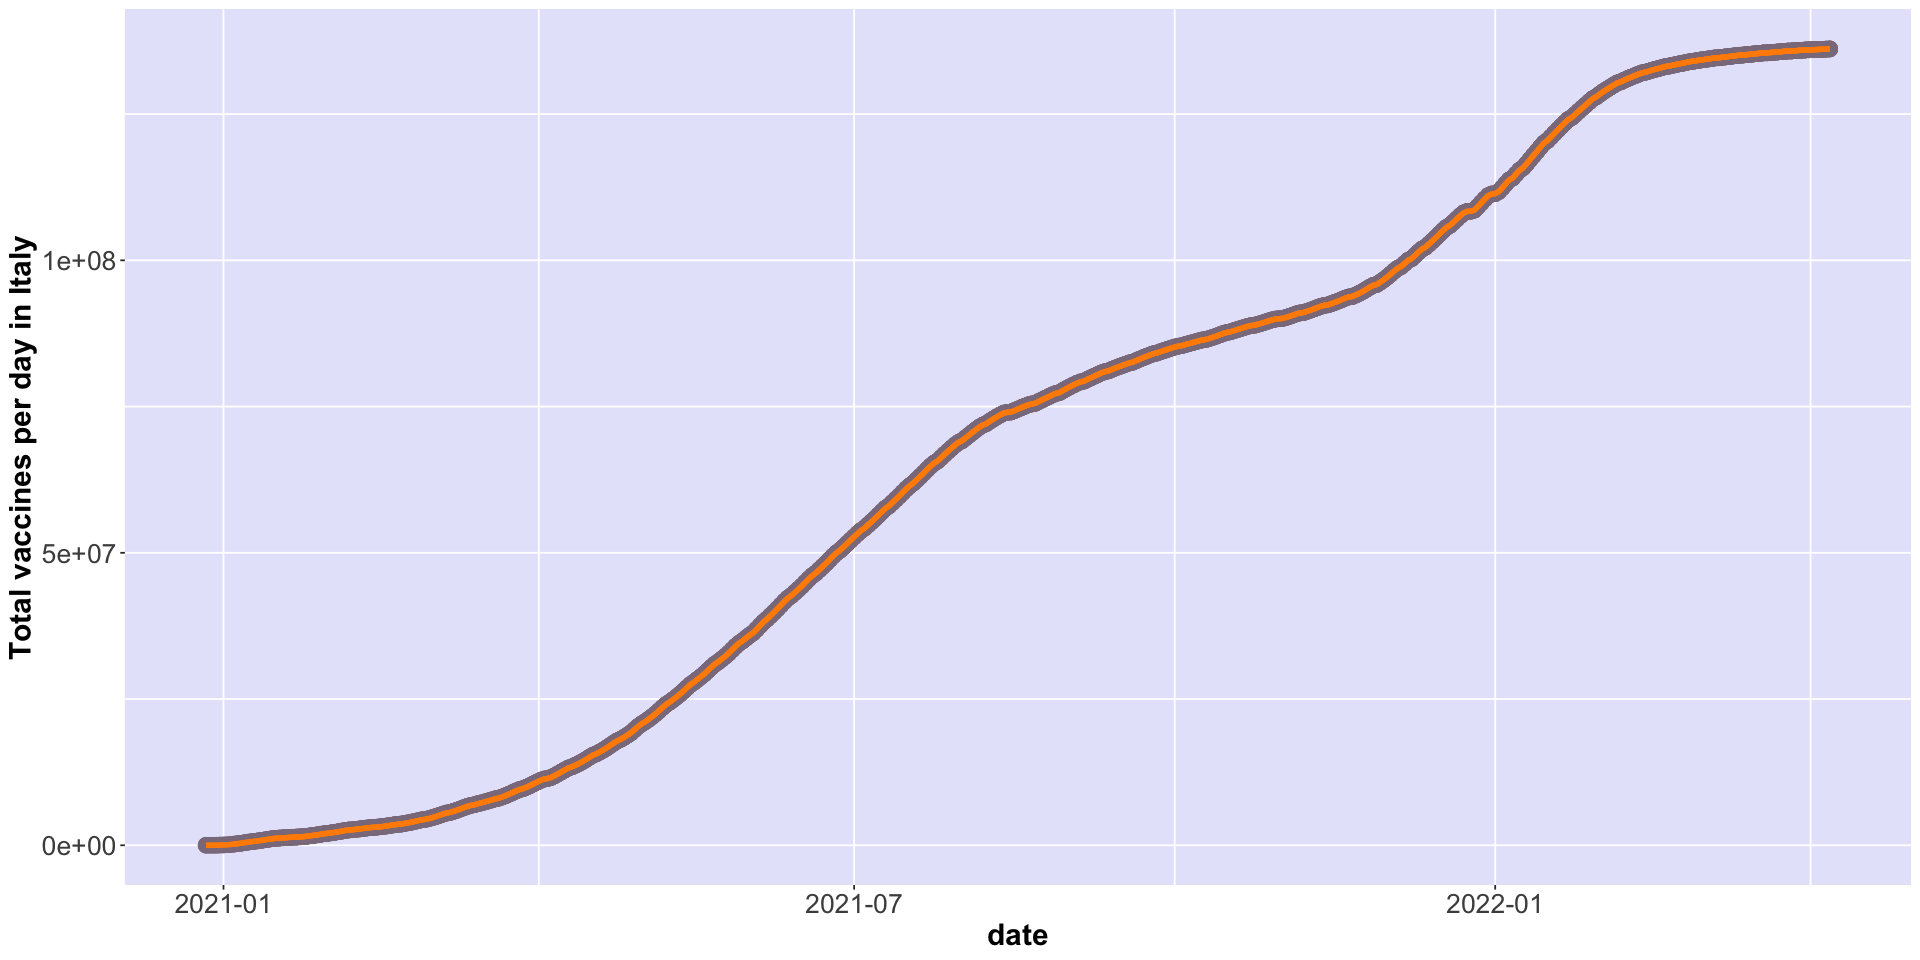

In [25]:
tot_sum <- vaccine_Italy%>%group_by(date)%>%mutate(total  = sum (total_vaccinations))

options(repr.plot.width = 16, repr.plot.height = 8)
total_vaccine <- ggplot(tot_sum) +
                    geom_point( aes(x = date, y = total, group=vaccine, colour=vaccine), color = 'thistle4',   size = 4) +
                    geom_line( aes(x = date,  y = total, group=vaccine, colour=vaccine), color = 'darkorange', size = 1.5) 
                    #facet_wrap( vars(Entity), nrow = 1, ncol = 5)#, trim_blank = FALSE); #scales = 'free');


layout <- theme( axis.text  = element_text(size=16),
                 axis.title = element_text(size=18,face="bold"),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels        <- labs( y  = "Total vaccines per day in Italy")
total_vaccine <- total_vaccine + layout + labels
total_vaccine

4. Do the same exercise for the following countries: Germany and United States of America

In [26]:
# Filter the original tibble
vaccine_Germany_US <- filter(vaccine.tb, location == c('Germany','United States') )

vaccine_Germany_US  <- complete(vaccine_Germany_US,location, date, vaccine) 

#  aggiungo una riga di 0 ogni volta che la colonna vaccine cambia
vaccine_Germany_US  <- vaccine_Germany_US  %>%
   split(list(.$'vaccine', .$'location')) %>%
   map_dfr(~bind_rows(tibble(total_vaccinations = 0), .x))

vaccine_Germany_US  <- vaccine_Germany_US  %>%
        fill('total_vaccinations') %>% # default direction down
        fill('total_vaccinations', .direction = "down")

vaccine_Germany_US [vaccine_Germany_US ==0] <- NA
vaccine_Germany_US  <- vaccine_Germany_US  %>% drop_na()

head(vaccine_Germany_US )


Warning message in location == c("Germany", "United States"):
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”


total_vaccinations location date       vaccine        
1  2                 Germany  2021-01-01 Johnson&Johnson
2  2                 Germany  2021-01-02 Johnson&Johnson
3  4                 Germany  2021-01-03 Johnson&Johnson
4  4                 Germany  2021-01-04 Johnson&Johnson
5 22                 Germany  2021-01-05 Johnson&Johnson
6 22                 Germany  2021-01-06 Johnson&Johnson

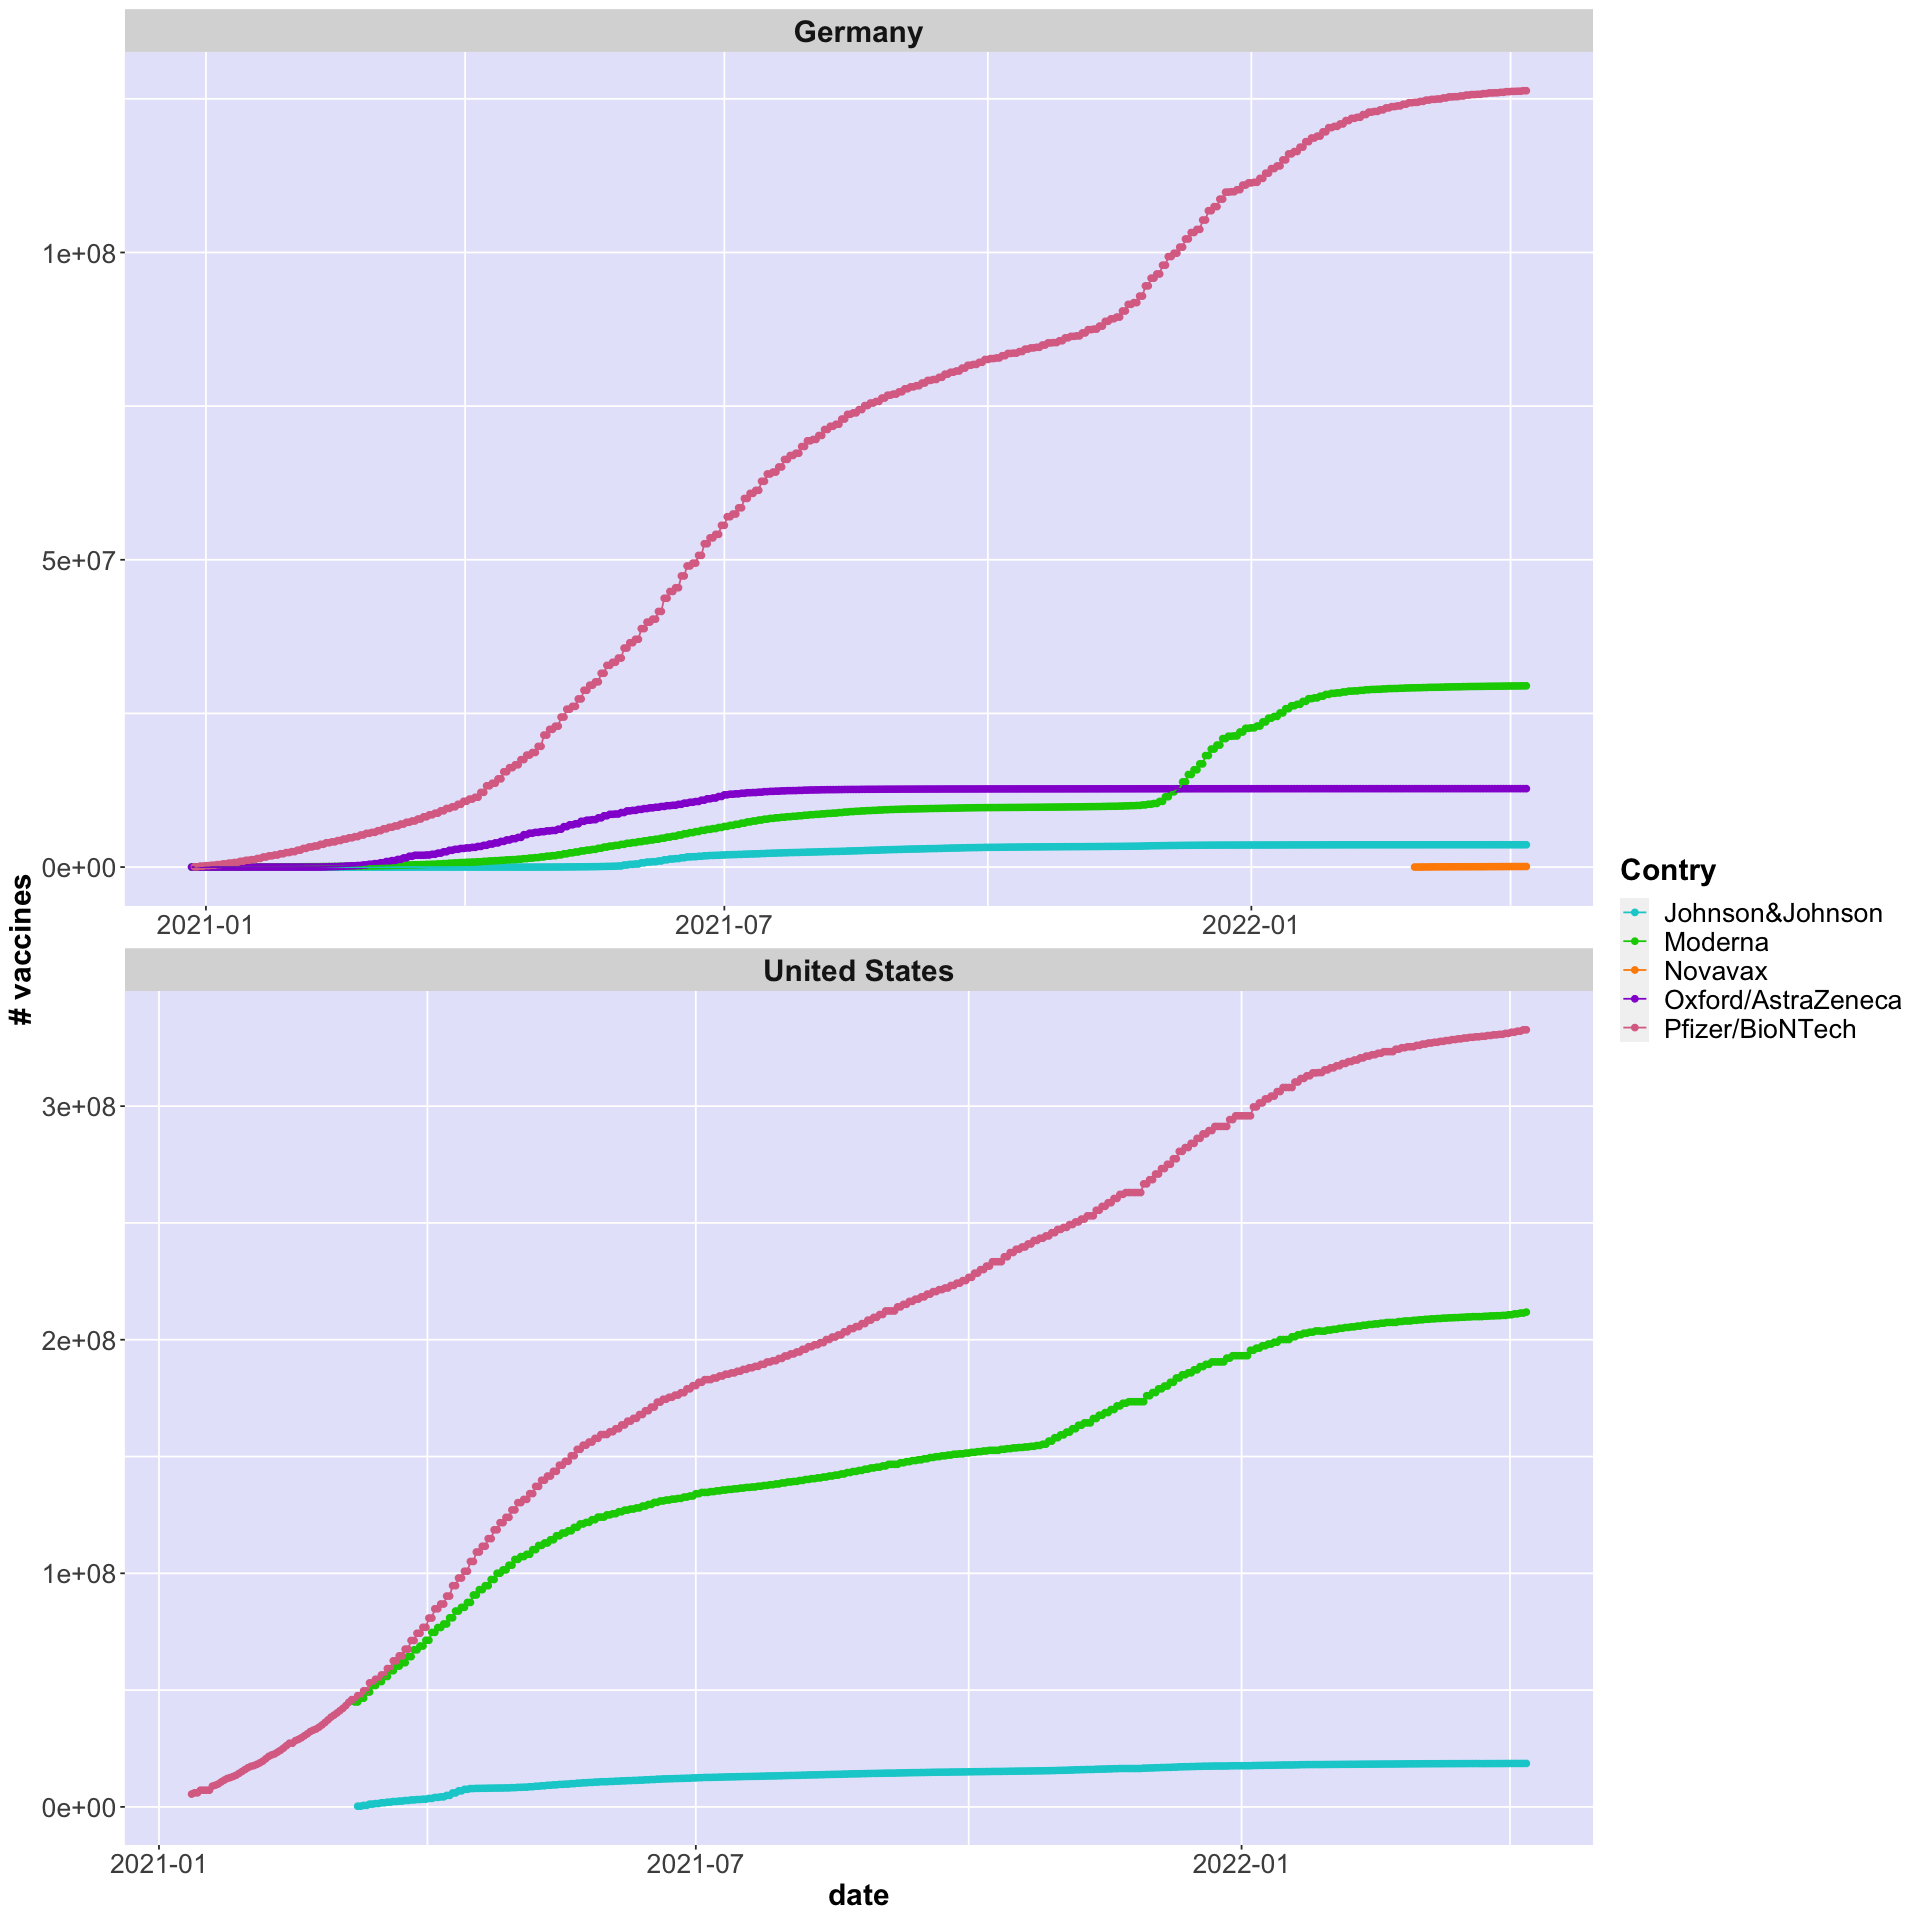

In [39]:
options( repr.plot.width = 16, repr.plot.height = 16 )
my_cols <- c('darkturquoise','green3','darkorange','darkviolet', 'palevioletred')

vaccine <- ggplot(subset(vaccine_Germany_US , location %in% c('Germany','United States')) ) +
                geom_point(aes(x = date, y = total_vaccinations,  group=vaccine, colour=vaccine) ) +
                geom_line(aes(x = date, y = total_vaccinations,  group=vaccine, colour=vaccine)) +
                scale_colour_manual(values = my_cols)+
                facet_wrap( vars(location), scales = 'free', nrow = 2, ncol = 1);
                
layout <- theme( axis.text   = element_text(size=16),
                 axis.title  = element_text(size=18, face="bold"),
                 strip.text  = element_text(size=18, face="bold"),
                 legend.title = element_text(size=18, face="bold"), 
                 legend.text = element_text(size=16),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size   = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels     <- labs( color = 'Contry',
                    y     = "# vaccines")

vaccine    <- vaccine + layout + labels

vaccine


In [28]:
# total number of vaccines shot per day in Germany and US:
tot_sum_Germany_US <- vaccine_Germany_US %>% split( f = .$'location')

tot_sum_Germany <-  tot_sum_Germany_US$Germany %>%
                        group_by(date) %>%
                        mutate(total  = sum (total_vaccinations)) #%>%
                        
tot_sum_US <- tot_sum_Germany_US$'United States'%>%
                        group_by(date) %>%
                        mutate(total  = sum (total_vaccinations)) #%>%


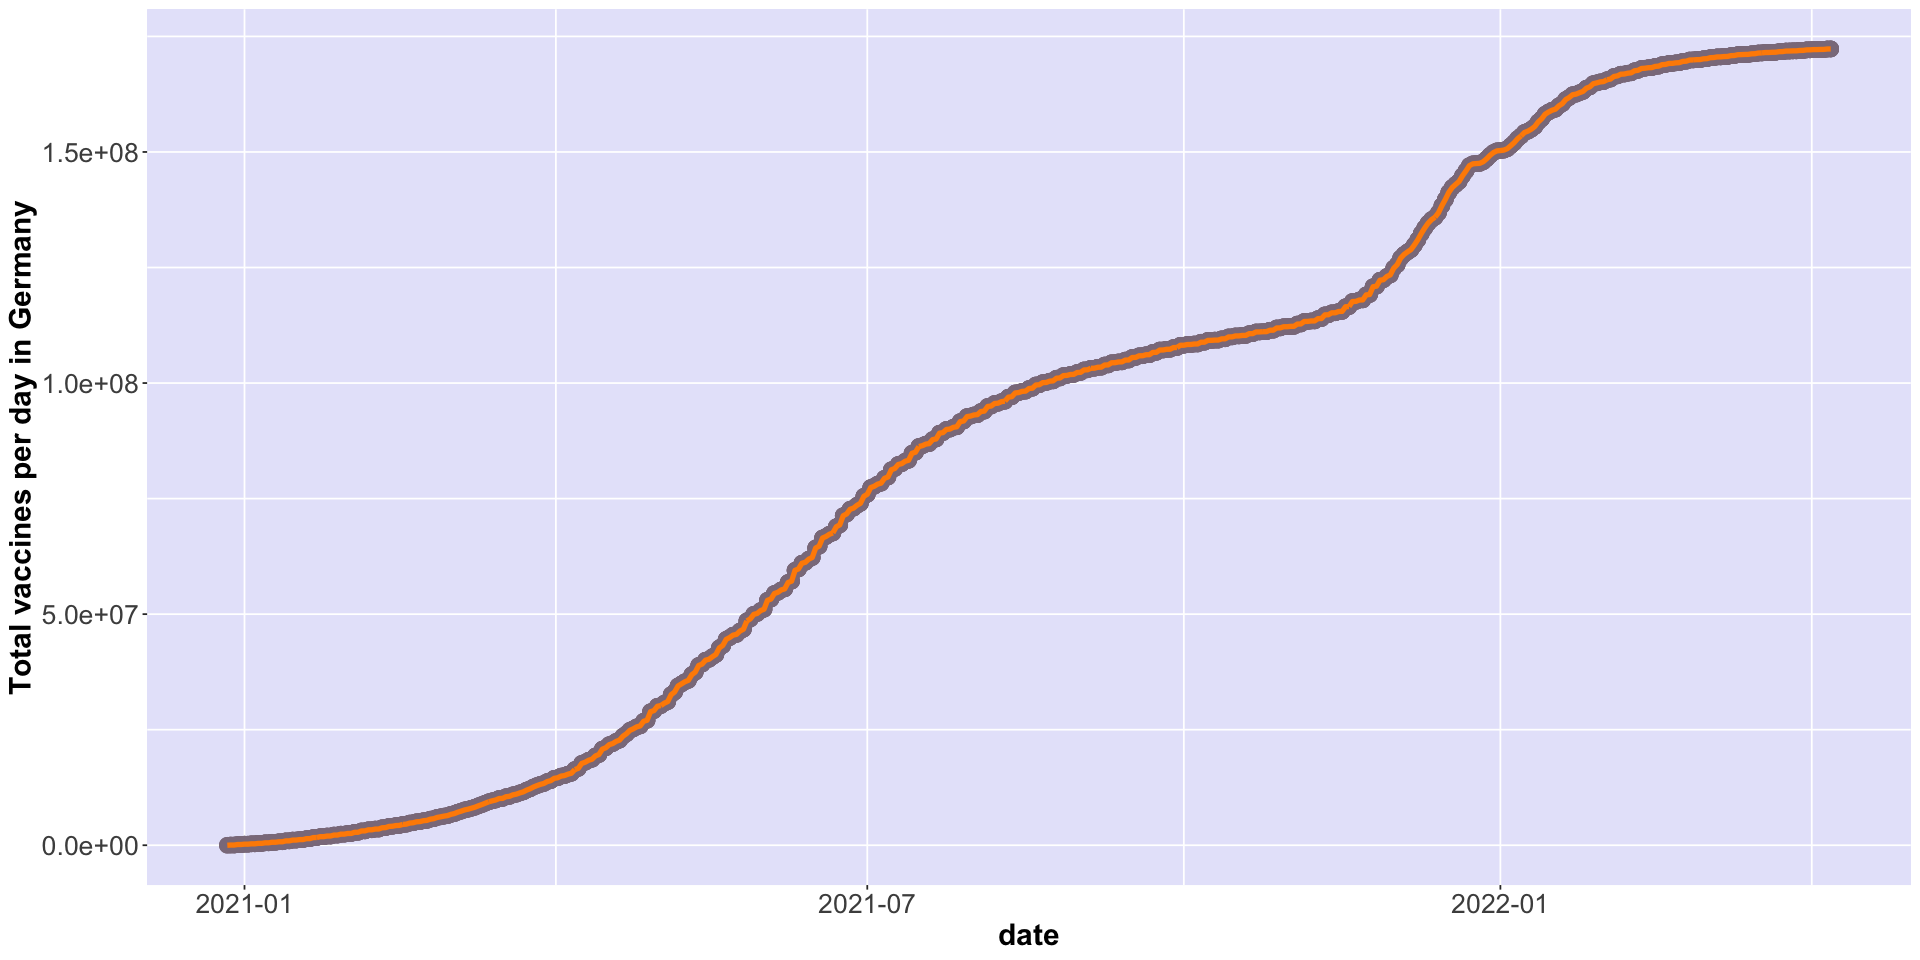

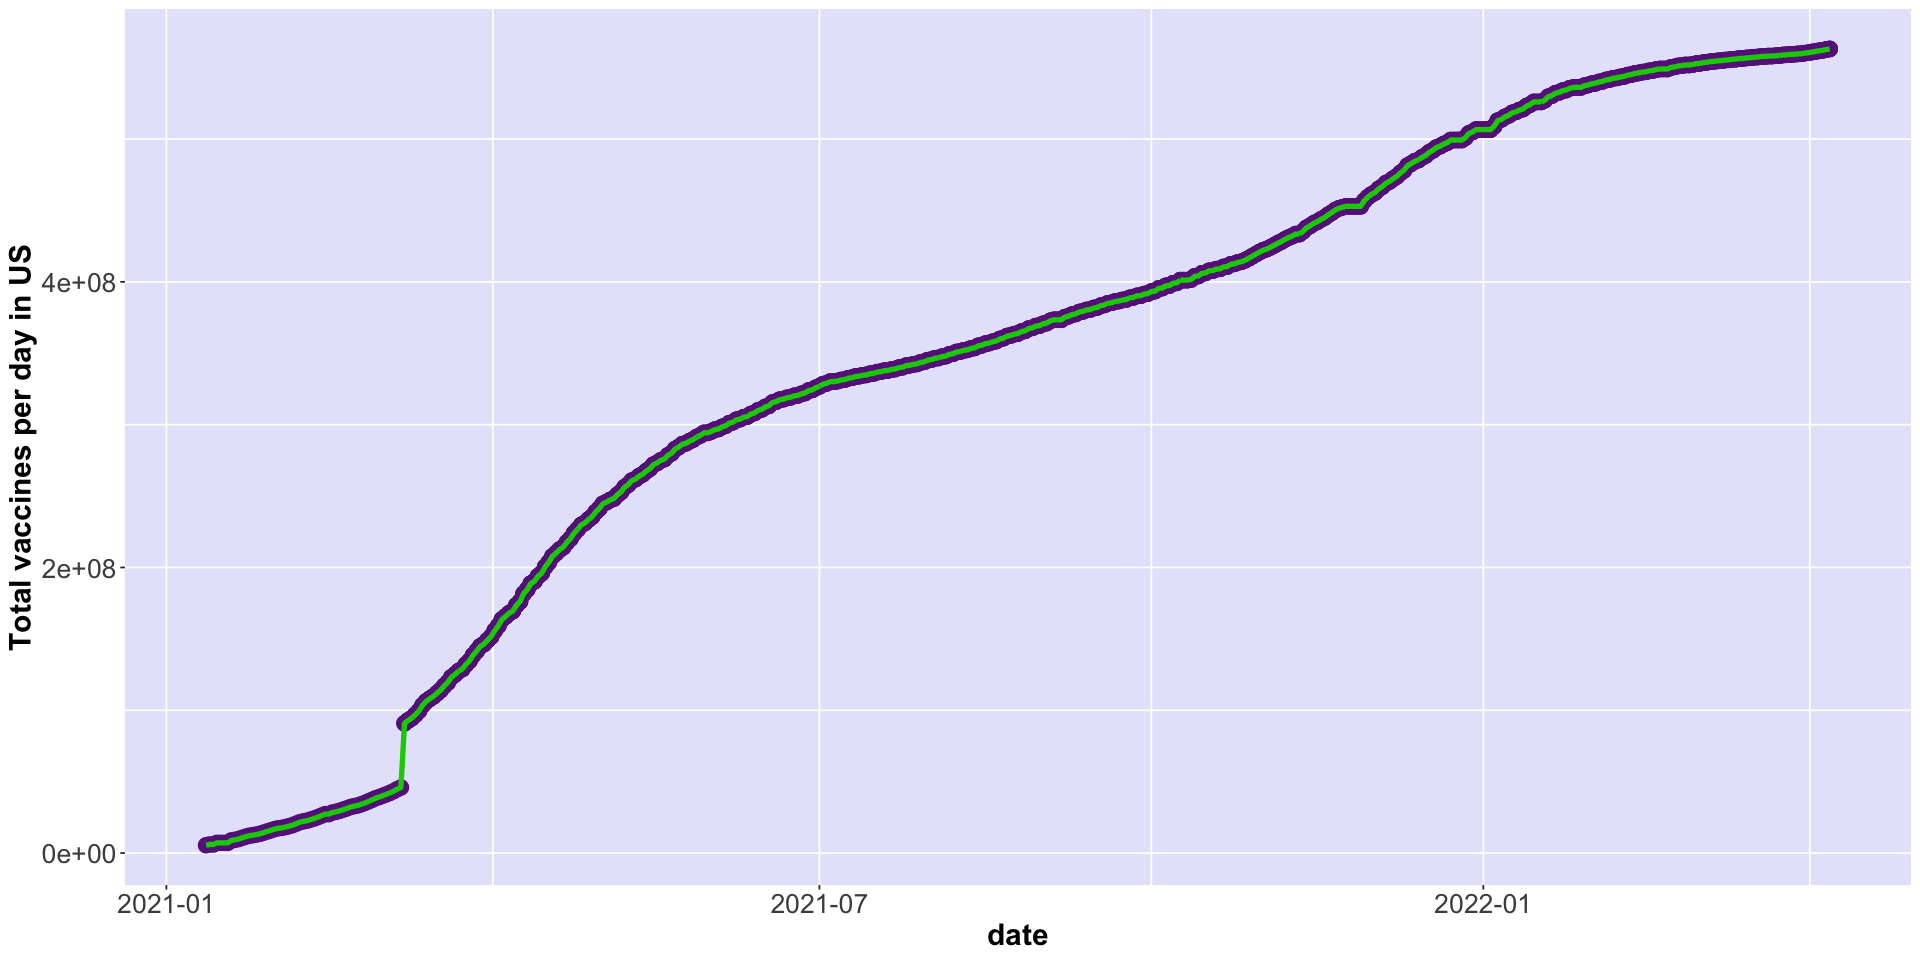

In [29]:

options(repr.plot.width=16, repr.plot.height=8)

tot_G   <- ggplot(tot_sum_Germany, aes(date)) + 
             geom_point(aes(y = total), color = 'thistle4',   size = 4) + 
             geom_line( aes(y = total), color = 'darkorange', size = 1.5) 

tot_US <- ggplot( tot_sum_US, aes(date)) + 
                geom_point( aes(y  = total, colour = 'derivative'), 
                            color  = 'darkorchid4', size = 4) +
                geom_line(  aes( y = total ),  
                            color  = 'green3', size = 1.5)      

layout    <- theme( axis.text        = element_text(size = 16),
                    axis.title       = element_text(size = 18, face = "bold"),
                    panel.background = element_rect(fill = 'lavender', colour = "lavender",
                                                    size = 0.5, linetype = "solid"),
                    panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
                    panel.grid.minor = element_line(size = 0.5, linetype = 'solid', colour = "white") )

labels_G    <- labs( y   = "Total vaccines per day in Germany")
labels_US   <- labs( y   = "Total vaccines per day in US")


tot_G  <- tot_G  + layout + labels_G
tot_US <- tot_US + layout + labels_US
tot_G
tot_US

• The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19
vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scot-
land, Wales, . . .) and international aggregates (World, continents, European Union ldots). They
can be identified by their iso code that starts with OWID


In [30]:
file <- 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vaccine_world   <- read_csv(url(file), show_col_types = FALSE)
head(vaccine_world)



location    iso_code date       total_vaccinations people_vaccinated
1 Afghanistan AFG      2021-02-22  0                  0               
2 Afghanistan AFG      2021-02-23 NA                 NA               
3 Afghanistan AFG      2021-02-24 NA                 NA               
4 Afghanistan AFG      2021-02-25 NA                 NA               
5 Afghanistan AFG      2021-02-26 NA                 NA               
6 Afghanistan AFG      2021-02-27 NA                 NA               
  people_fully_vaccinated total_boosters daily_vaccinations_raw
1 NA                      NA             NA                    
2 NA                      NA             NA                    
3 NA                      NA             NA                    
4 NA                      NA             NA                    
5 NA                      NA             NA                    
6 NA                      NA             NA                    
  daily_vaccinations total_vaccinations_per_hundred
1   NA                0                            
2 1367               NA                            
3 1367               NA                            
4 1367               NA                            
5 1367               NA                            
6 1367               NA                            
  people_vaccinated_per_hundred people_fully_vaccinated_per_hundred
1  0                            NA                                 
2 NA                            NA                                 
3 NA                            NA                                 
4 NA                            NA                                 
5 NA                            NA                                 
6 NA                            NA                                 
  total_boosters_per_hundred daily_vaccinations_per_million
1 NA                         NA                            
2 NA                         34                            
3 NA                         34                            
4 NA                         34                            
5 NA                         34                            
6 NA                         34                            
  daily_people_vaccinated daily_people_vaccinated_per_hundred
1   NA                       NA                              
2 1367                    0.003                              
3 1367                    0.003                              
4 1367                    0.003                              
5 1367                    0.003                              
6 1367                    0.003

1 Selecting all the European countries in the tibble, plot the number of daily vaccinations per million
as a function of date

In [31]:
vaccine_Europe <- filter(vaccine_world, location == 'Europe' )
# remove NAs
vaccine_Europe <- vaccine_Europe %>% replace(is.na(.), 0)
head(vaccine_Europe)

location iso_code date       total_vaccinations people_vaccinated
1 Europe   OWID_EUR 2020-12-02 0                  0                
2 Europe   OWID_EUR 2020-12-03 0                  0                
3 Europe   OWID_EUR 2020-12-04 1                  1                
4 Europe   OWID_EUR 2020-12-05 1                  1                
5 Europe   OWID_EUR 2020-12-06 1                  1                
6 Europe   OWID_EUR 2020-12-07 2                  2                
  people_fully_vaccinated total_boosters daily_vaccinations_raw
1 0                       0              0                     
2 0                       0              0                     
3 0                       0              0                     
4 0                       0              0                     
5 0                       0              0                     
6 0                       0              0                     
  daily_vaccinations total_vaccinations_per_hundred
1 0                  0                             
2 0                  0                             
3 0                  0                             
4 0                  0                             
5 0                  0                             
6 0                  0                             
  people_vaccinated_per_hundred people_fully_vaccinated_per_hundred
1 0                             0                                  
2 0                             0                                  
3 0                             0                                  
4 0                             0                                  
5 0                             0                                  
6 0                             0                                  
  total_boosters_per_hundred daily_vaccinations_per_million
1 0                          0                             
2 0                          0                             
3 0                          0                             
4 0                          0                             
5 0                          0                             
6 0                          0                             
  daily_people_vaccinated daily_people_vaccinated_per_hundred
1 0                       0                                  
2 0                       0                                  
3 0                       0                                  
4 0                       0                                  
5 0                       0                                  
6 0                       0

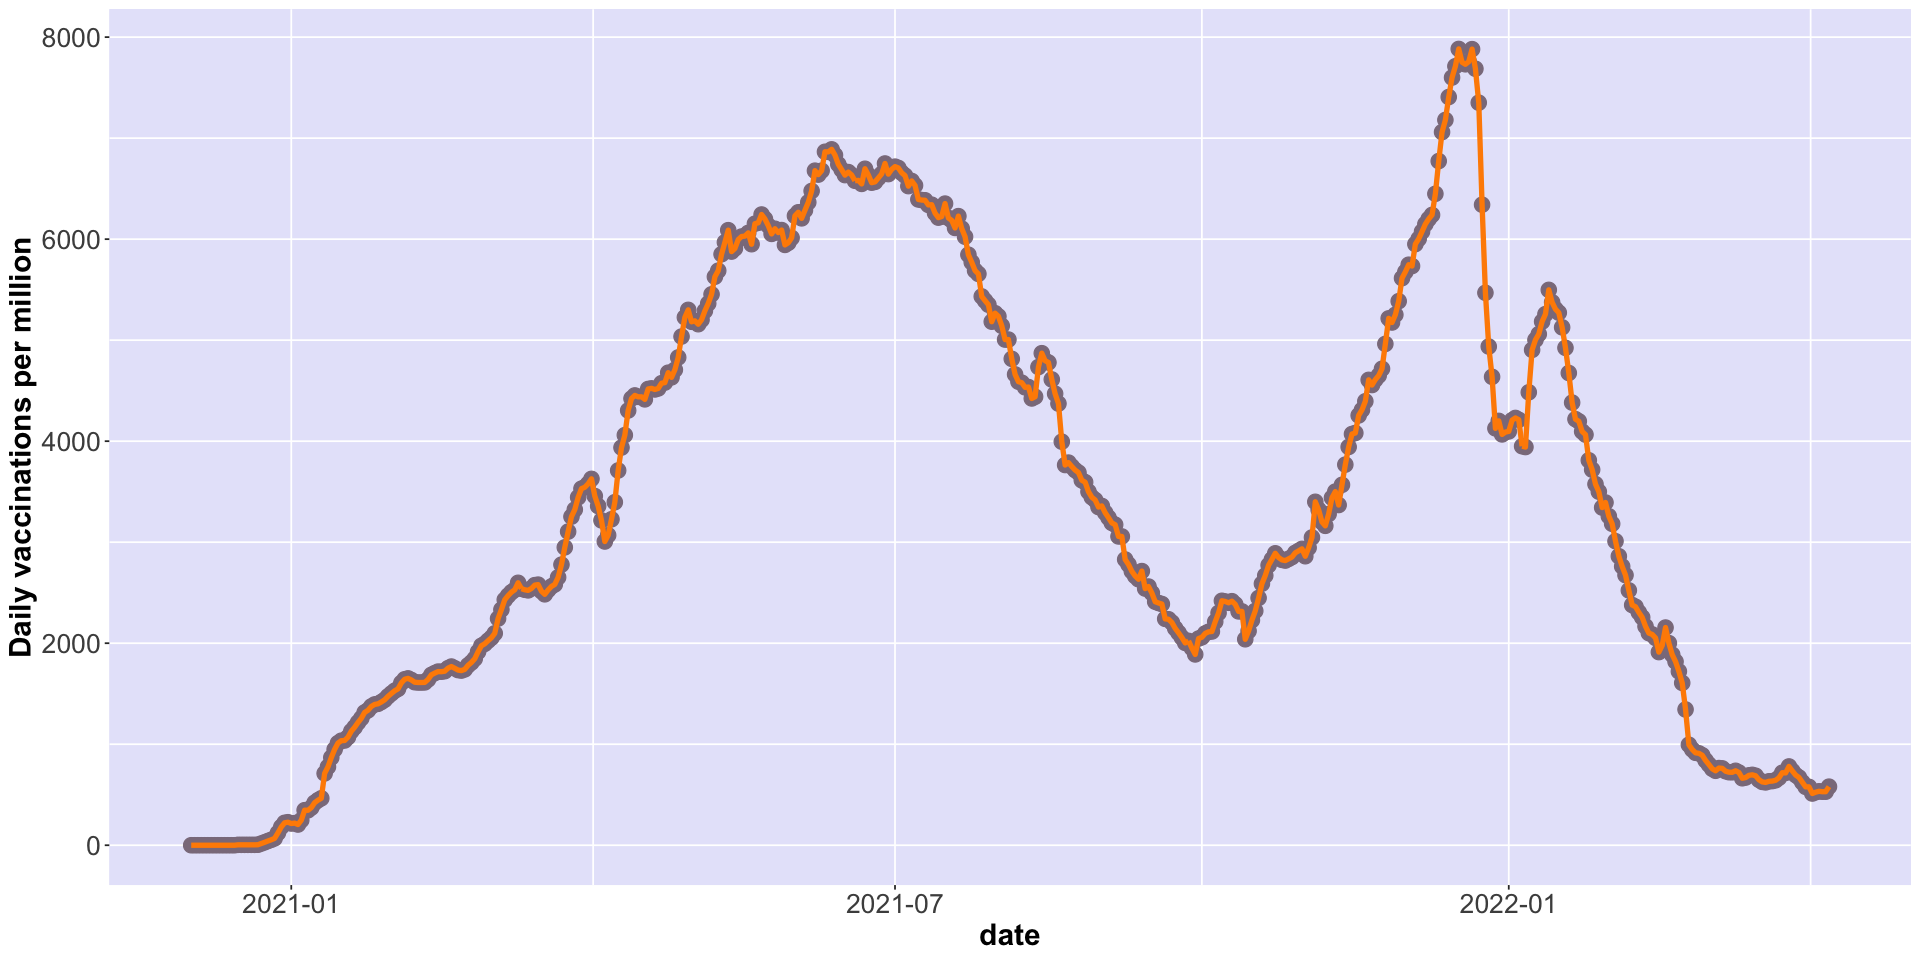

In [32]:
options(repr.plot.width=16, repr.plot.height=8)

vaccine_Eu <- ggplot(vaccine_Europe, aes(date)) + 
             geom_point(aes(y = daily_vaccinations_per_million), color = 'thistle4',   size = 4) + 
             geom_line( aes(y = daily_vaccinations_per_million), color = 'darkorange', size = 1.5) 

layout     <- theme( axis.text        = element_text(size = 16),
                    axis.title       = element_text(size = 18, face = "bold"),
                    panel.background = element_rect(fill = 'lavender', colour = "lavender",
                                                    size = 0.5, linetype = "solid"),
                    panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "white"), 
                    panel.grid.minor = element_line(size = 0.5, linetype = 'solid', colour = "white") )

labels    <- labs( y   = " Daily vaccinations per million ")

vaccine_Eu <- vaccine_Eu + layout + labels

vaccine_Eu

2 Study the data structure and produce few relevant plots of your taste

In [33]:
shift_1  <- c(tail(vaccine_Europe$'people_vaccinated', -1), rep(NA, 1))
shift_2  <- c(tail(vaccine_Europe$'people_fully_vaccinated', -1), rep(NA, 1))
shift_3  <- c(tail(vaccine_Europe$'total_boosters', -1), rep(NA, 1))

vaccine_Europe <- cbind( vaccine_Europe, shift_1, shift_2, shift_3 )

delta_1  <- vaccine_Europe$'shift_1' -  vaccine_Europe$'people_vaccinated'  
delta_2  <- vaccine_Europe$'shift_2' -  vaccine_Europe$'people_fully_vaccinated'  
delta_3  <- vaccine_Europe$'shift_3' -  vaccine_Europe$'total_boosters'  

vaccine_Europe <- cbind( vaccine_Europe, delta_1, delta_2, delta_3 )
vaccine_Europe <- na.omit( vaccine_Europe ) 
head(vaccine_Europe)


location iso_code date       total_vaccinations people_vaccinated
1 Europe   OWID_EUR 2020-12-02 0                  0                
2 Europe   OWID_EUR 2020-12-03 0                  0                
3 Europe   OWID_EUR 2020-12-04 1                  1                
4 Europe   OWID_EUR 2020-12-05 1                  1                
5 Europe   OWID_EUR 2020-12-06 1                  1                
6 Europe   OWID_EUR 2020-12-07 2                  2                
  people_fully_vaccinated total_boosters daily_vaccinations_raw
1 0                       0              0                     
2 0                       0              0                     
3 0                       0              0                     
4 0                       0              0                     
5 0                       0              0                     
6 0                       0              0                     
  daily_vaccinations total_vaccinations_per_hundred ⋯
1 0                  0                              ⋯
2 0                  0                              ⋯
3 0                  0                              ⋯
4 0                  0                              ⋯
5 0                  0                              ⋯
6 0                  0                              ⋯
  total_boosters_per_hundred daily_vaccinations_per_million
1 0                          0                             
2 0                          0                             
3 0                          0                             
4 0                          0                             
5 0                          0                             
6 0                          0                             
  daily_people_vaccinated daily_people_vaccinated_per_hundred shift_1 shift_2
1 0                       0                                   0       0      
2 0                       0                                   1       0      
3 0                       0                                   1       0      
4 0                       0                                   1       0      
5 0                       0                                   2       0      
6 0                       0                                   8       0      
  shift_3 delta_1 delta_2 delta_3
1 0       0       0       0      
2 0       1       0       0      
3 0       0       0       0      
4 0       0       0       0      
5 0       1       0       0      
6 0       6       0       0

Barplots with the number of vaccines shotted each day divided in first, second and third dose

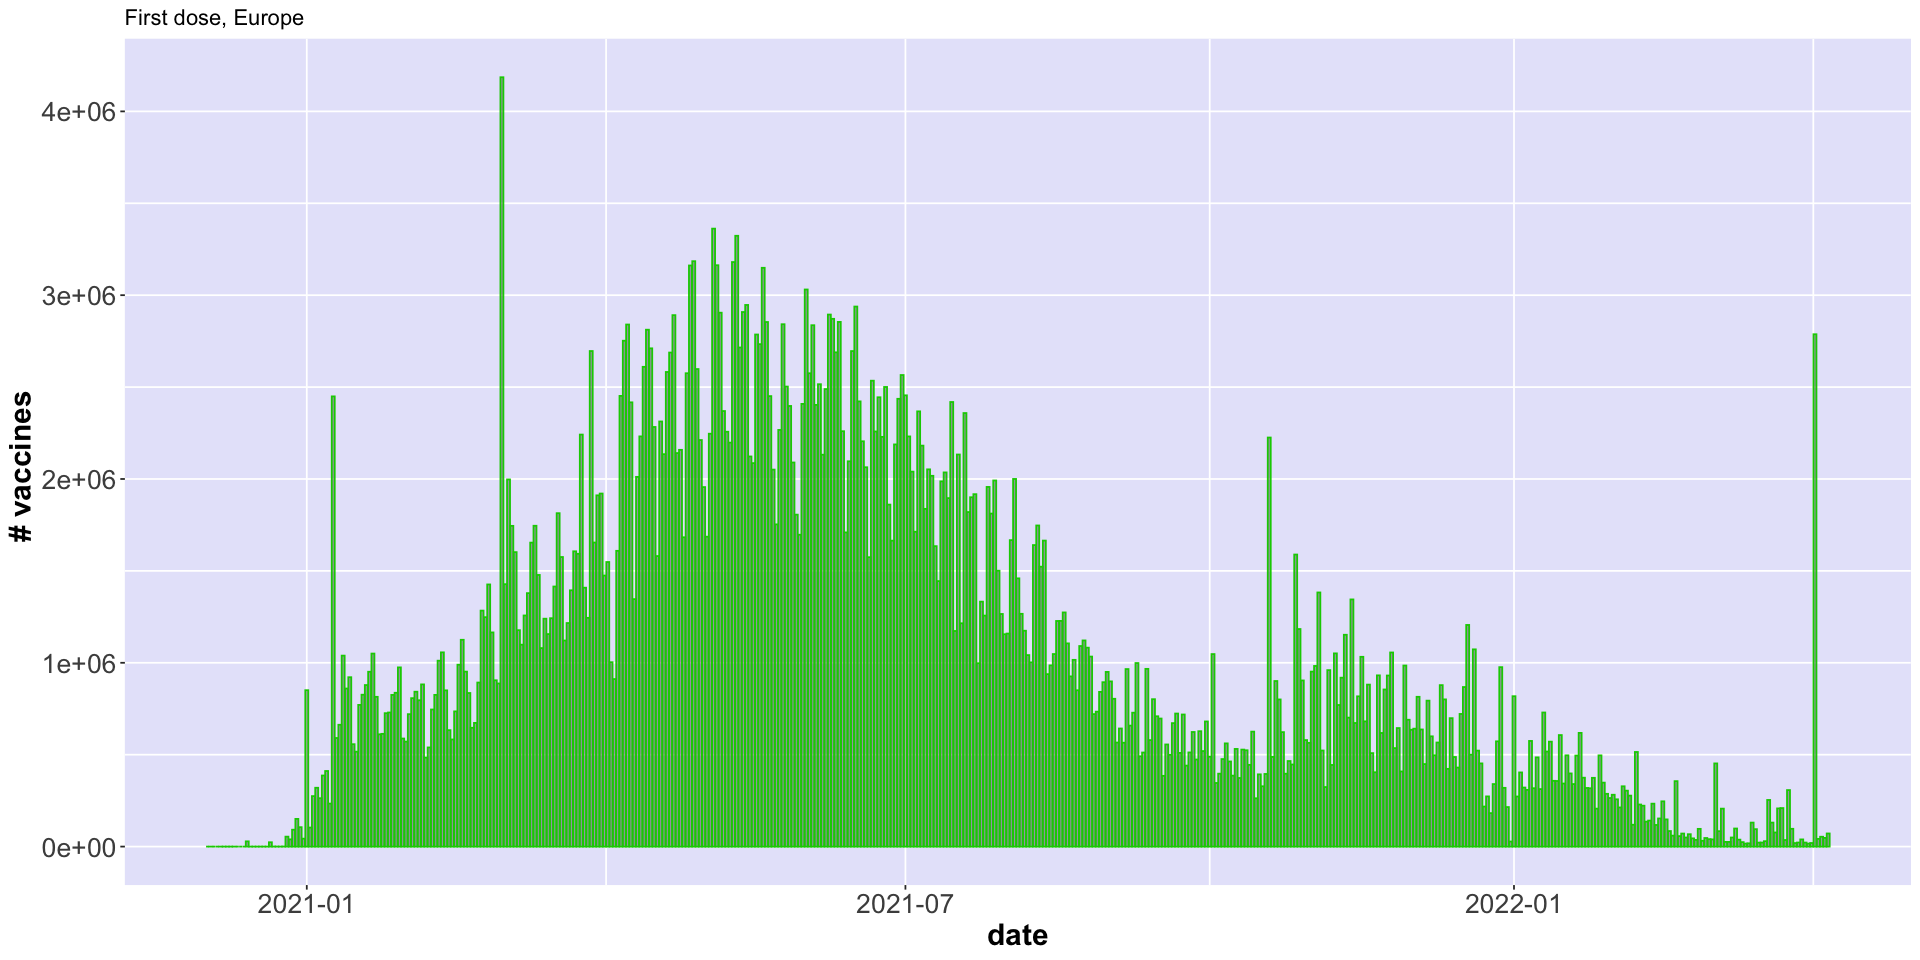

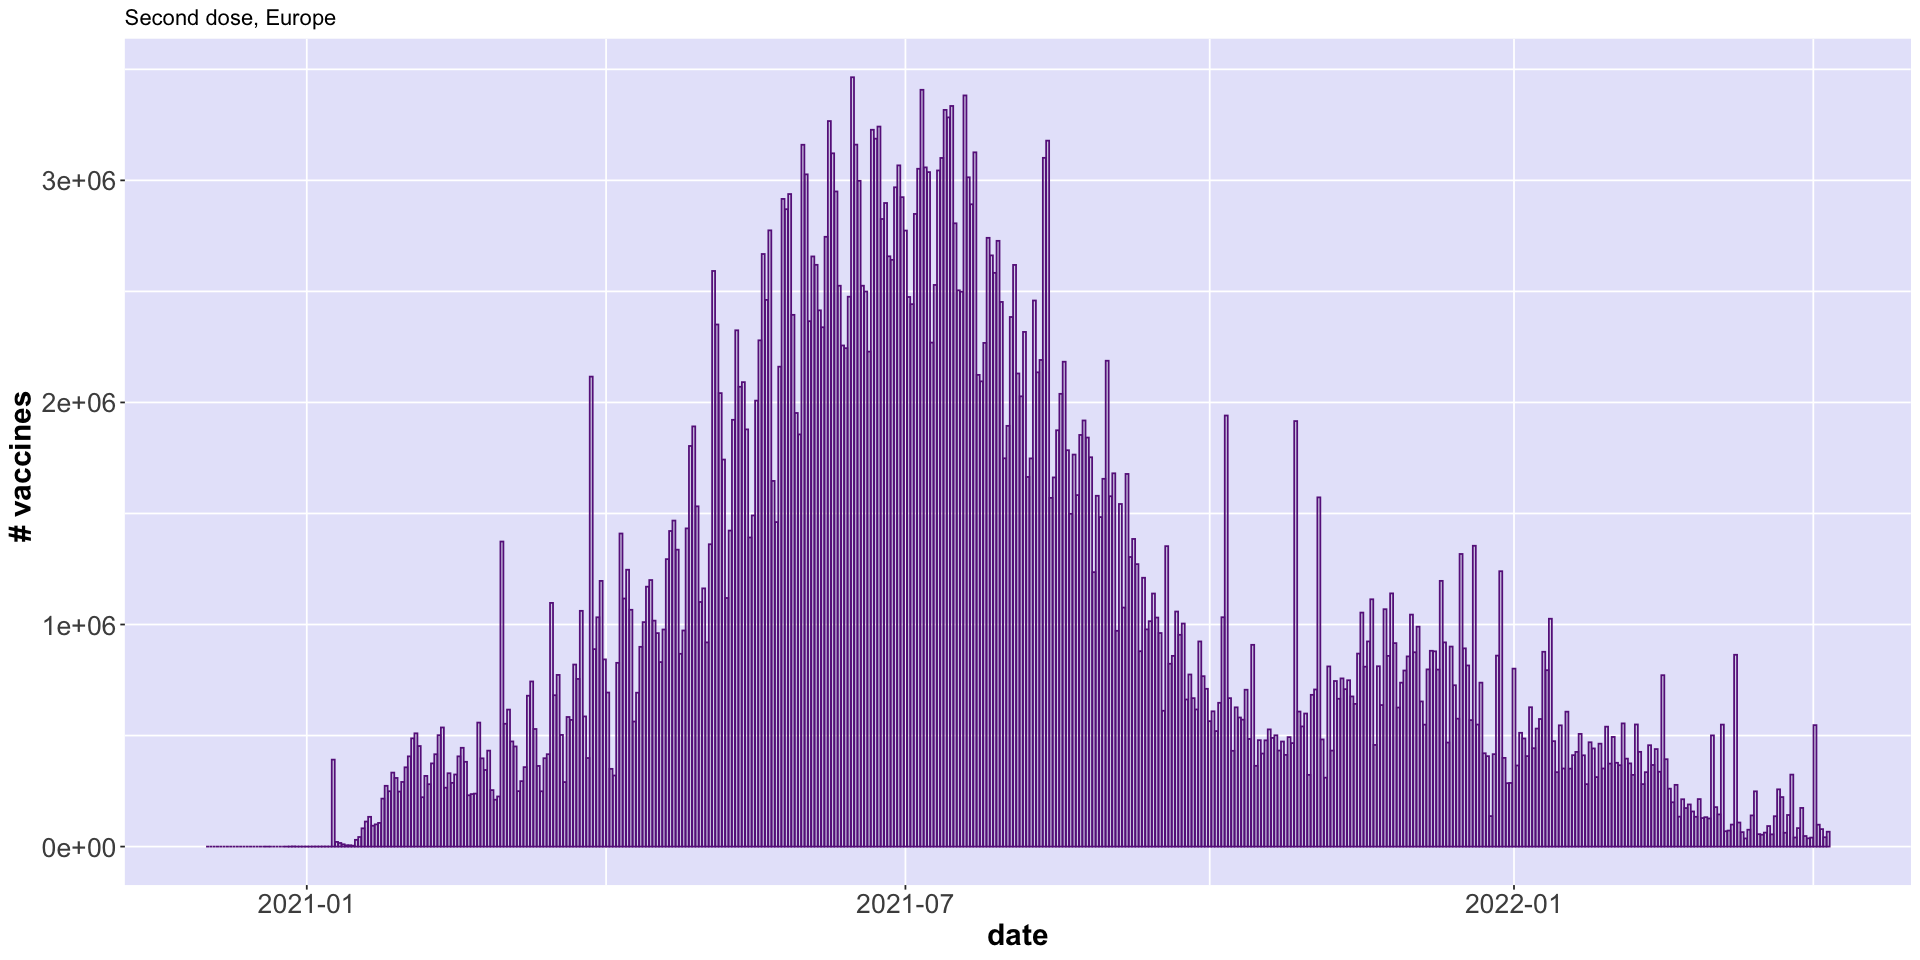

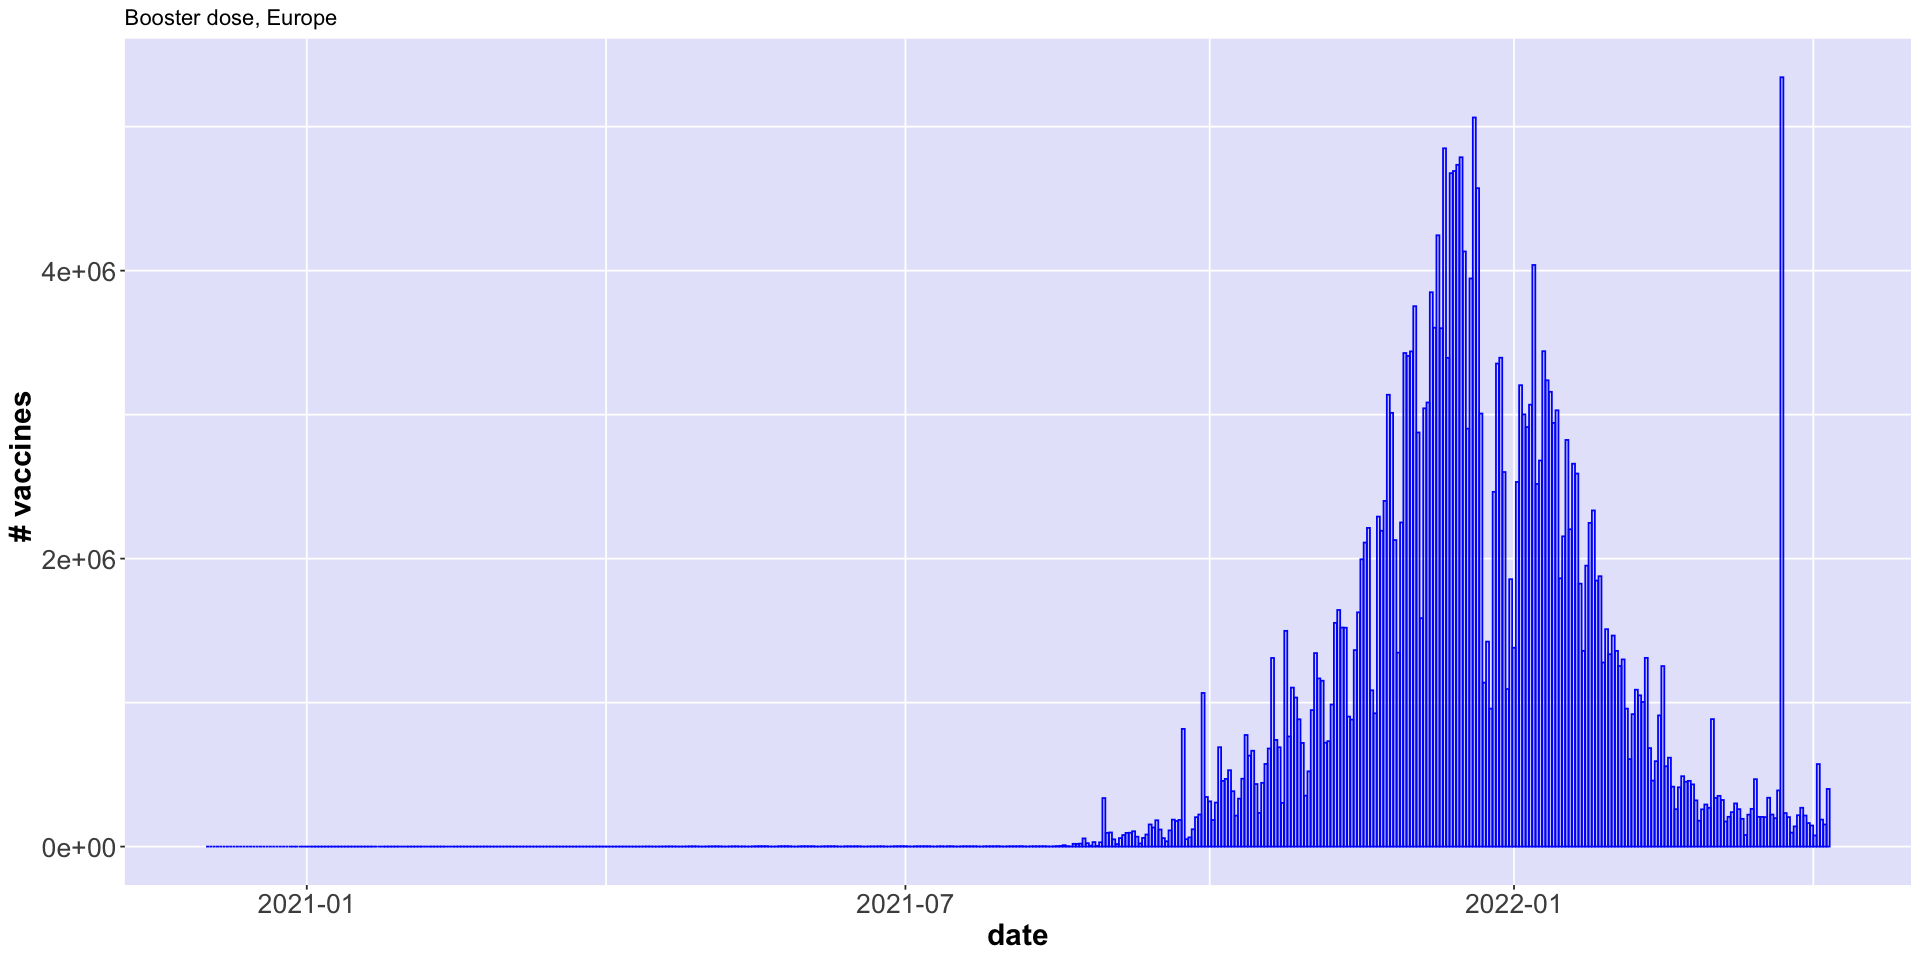

In [36]:
options(repr.plot.width = 16, repr.plot.height = 8)

vax_barplot_1  <- ggplot( vaccine_Europe ) + 
                geom_bar( aes(x = date, y = delta_1), stat  = 'identity', group='c', color  = 'green3', alpha=0.5) 

vax_barplot_2  <- ggplot( vaccine_Europe, group=date, colour=date) + 
                geom_bar( aes(x = date, y = delta_2), stat  = 'identity', group='c', color  = 'darkorchid4', alpha=0.1)

vax_barplot_3  <- ggplot( vaccine_Europe, group=date, colour=date) + 
                geom_bar( aes(x = date, y = delta_3), stat  = 'identity', group='c', color  = 'blue', alpha=0.1)



layout <- theme( axis.text  = element_text(size=16),
                 axis.title = element_text(size=18,face="bold"),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

title_1    <-   ggtitle('First dose, Europe' )
title_2    <-   ggtitle('Second dose, Europe' )
title_3    <-   ggtitle('Booster dose, Europe' )
labels     <-   labs( y  = '# vaccines ')

vax_barplot_1 <- vax_barplot_1 + layout + labels + title_1
vax_barplot_2 <- vax_barplot_2 + layout + labels + title_2
vax_barplot_3 <- vax_barplot_3 + layout + labels + title_3
cat('Barplots with the number of vaccines shotted each day divided in first, second and third dose')
vax_barplot_1
vax_barplot_2
vax_barplot_3

Comparison between Europe and the other 4 continents

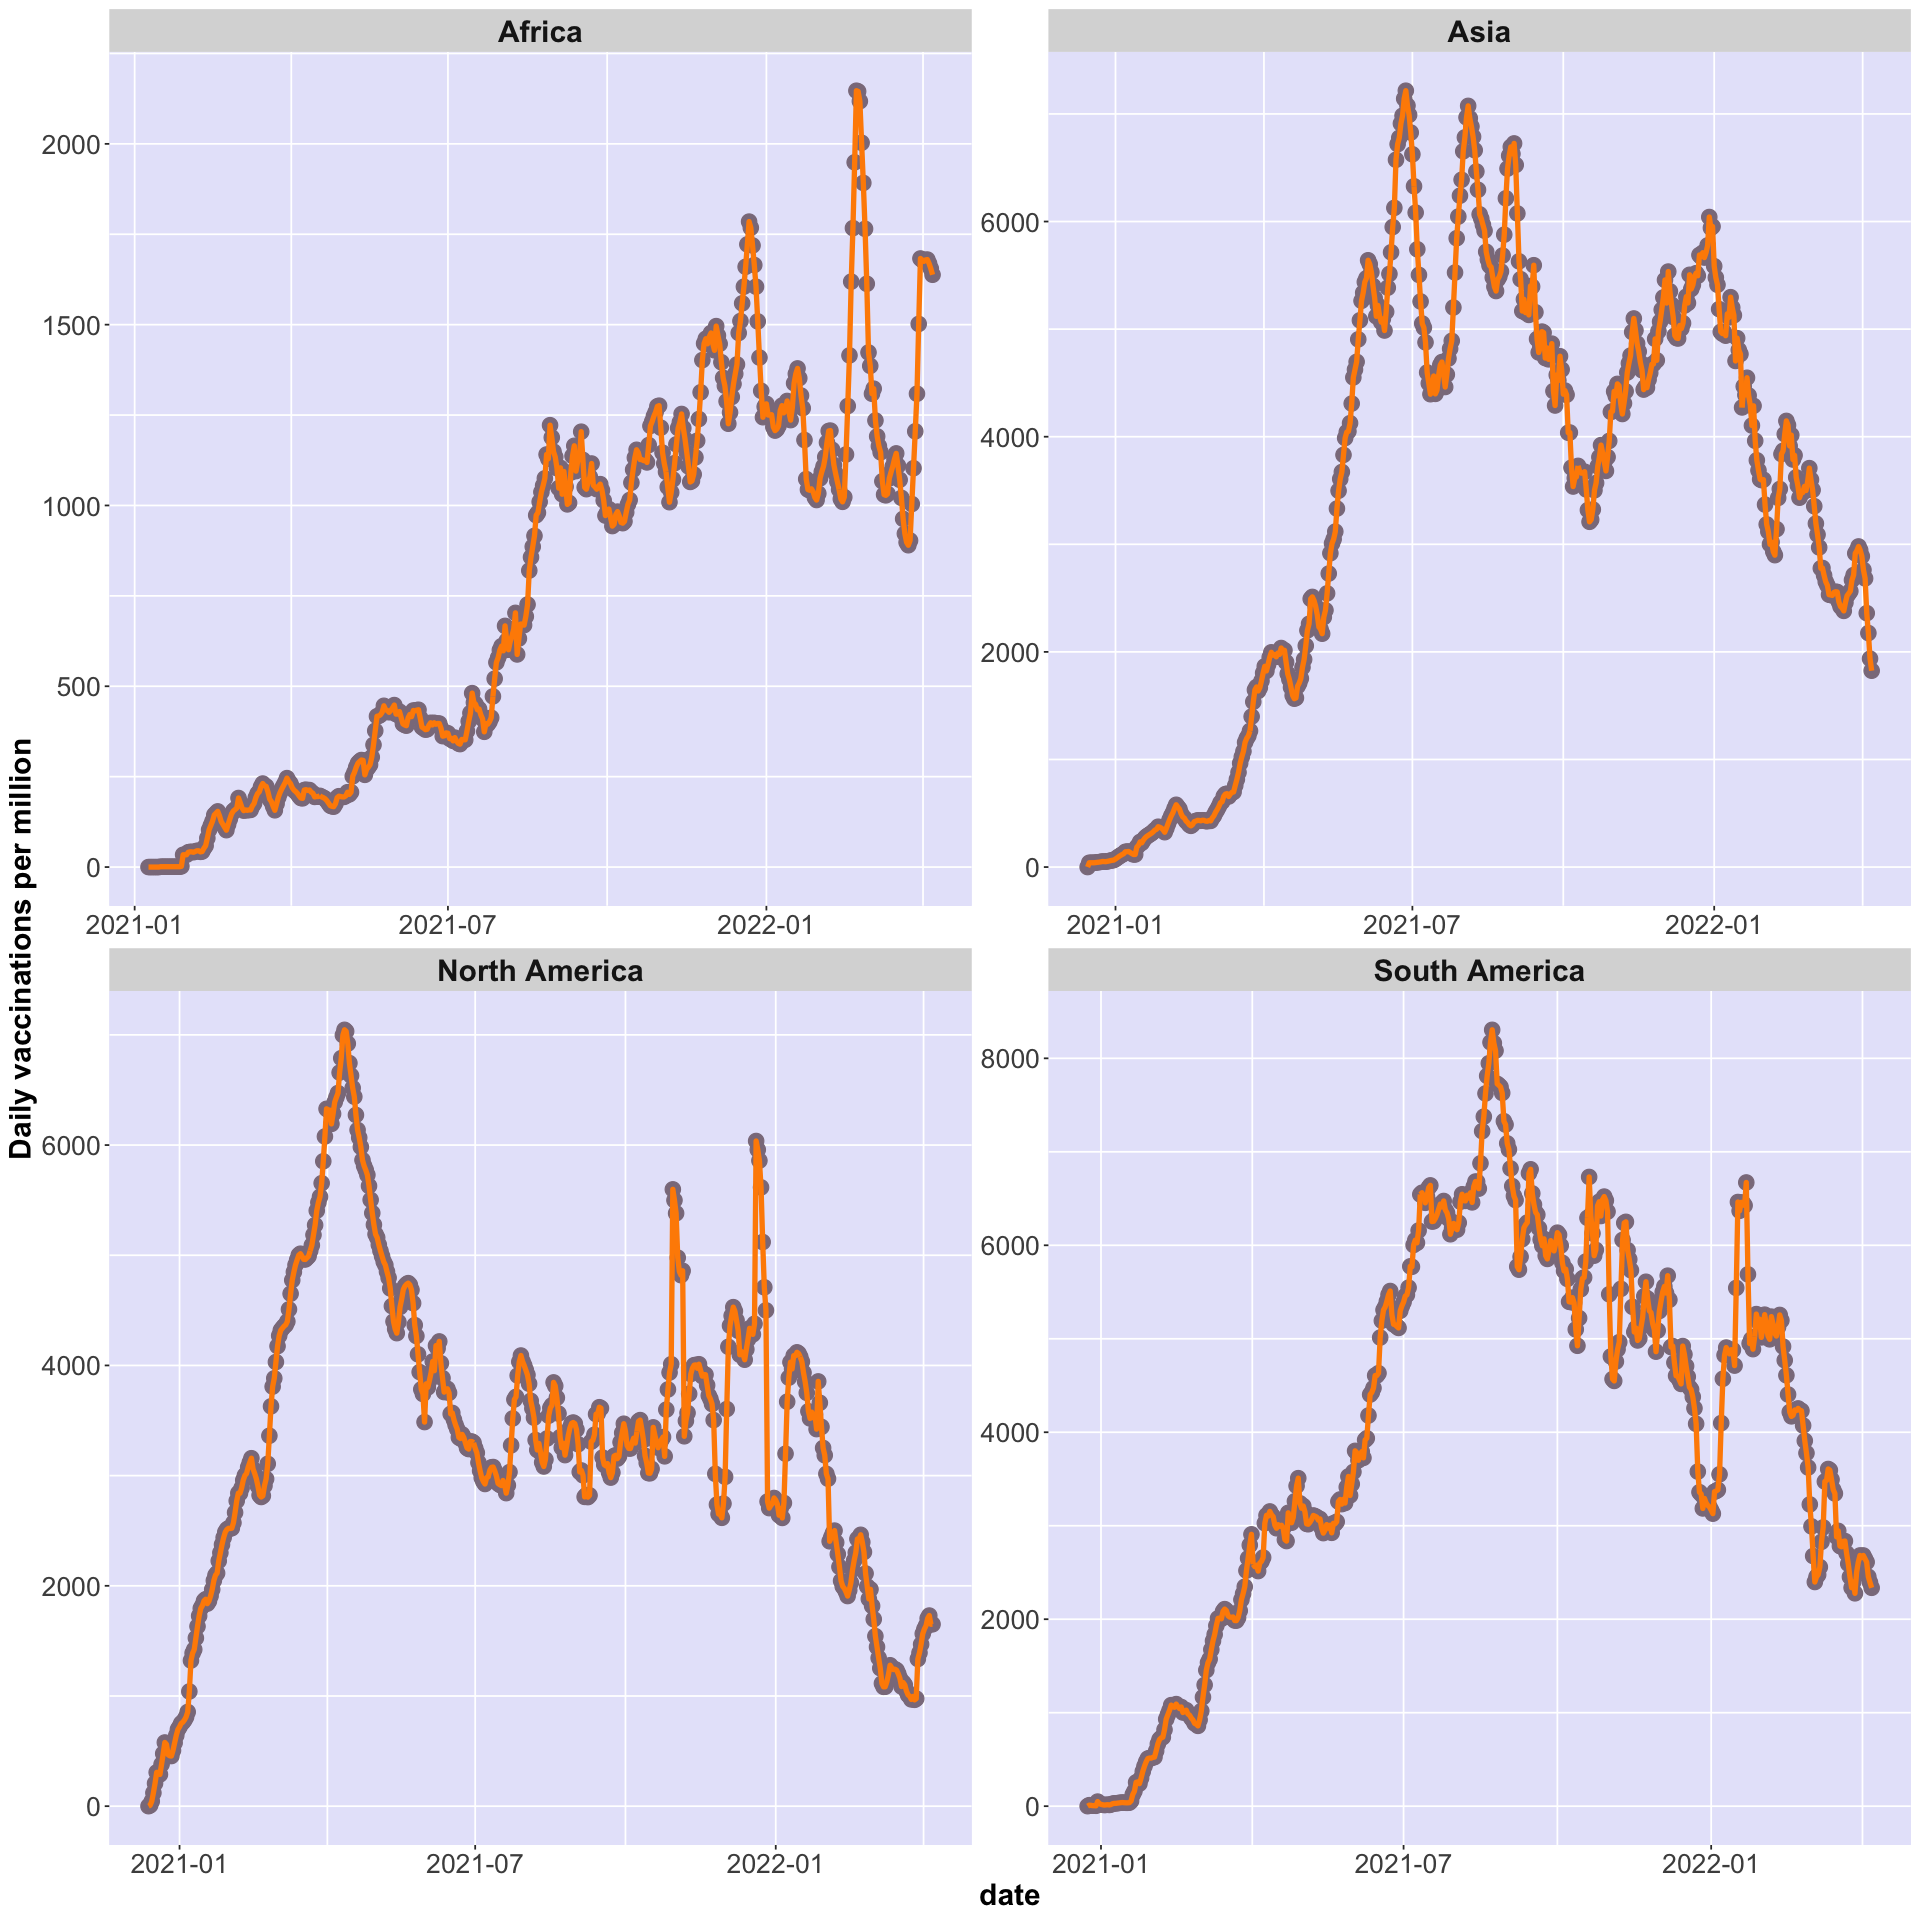

In [35]:
options( repr.plot.width = 16, repr.plot.height = 16 )
my_cols <- c('darkturquoise','green3','darkorange','darkviolet', 'palevioletred')

vaccine_w <- ggplot(subset(vaccine_world , location %in% c('Africa','America', 'Asia','North America', 'South America' )) ) +
                geom_point(aes(x = date, y = daily_vaccinations_per_million), colour = 'thistle4', size = 4 ) +
                geom_line(aes(x = date, y = daily_vaccinations_per_million), colour = 'darkorange',size = 1.5) +
                scale_colour_manual(values = my_cols)+
                facet_wrap( vars(location), scales = 'free', nrow = 2, ncol = 2);
                
layout <- theme( axis.text   = element_text(size=16),
                 axis.title  = element_text(size=18, face="bold"),
                 strip.text  = element_text(size=18, face="bold"),
                 legend.title = element_text(size=18, face="bold"), 
                 legend.text = element_text(size=16),
                 panel.background = element_rect(fill = 'lavender',
                 colour = "lavender",
                 size   = 0.5, linetype = "solid"),
                 panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"), 
                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid',
                 colour = "white"))

labels     <- labs( color = 'Contry',
                    y     =  'Daily vaccinations per million')

vaccine_w    <- vaccine_w + layout + labels

vaccine_w
